In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




## Importing the Cleaned Dataset

In [ ]:
!pip install dask --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.4 MB/s eta 0:00:00


In [ ]:

import dask.dataframe as dd

# Step 1: Load with Dask (lazy loading)
ddf = dd.read_csv('/content/drive/MyDrive/sql_chunk_cleaned/all_cleaned.csv',assume_missing=True)

# Step 2: Optionally filter/select columns early
# ddf = ddf[['col1', 'col2', ...]]

# Step 3: Convert to pandas (this is the memory-heavy step)
df = ddf.compute()

In [ ]:
# prompt: give me code to count Nan values in df all columns

# Count NaN values per column
nan_counts = df.isnull().sum()

# Print the counts
print("NaN counts per column in df:")
print(nan_counts)

# Optional: print total NaN values
total_nan = nan_counts.sum()
print(f"\nTotal NaN values in df: {total_nan}")

NaN counts per column in df:
rpt_id                            0
tracking_id                       0
country_name                      0
center_id                         0
batch_id                          0
user_id                           0
user_joining_date                 0
course_edge_id                    0
course_id                         0
course_code                       0
course                            0
topic_edge_id                     0
topic_name                        0
chapter_edge_id                   0
chapter_name                      0
last_attempted_date               0
quiz_last_attempted_date          0
create_date                  162449
component_edge_id                 0
component_name                    0
component_type                    0
rp_parent_edge_id           1966254
component_time                    0
complete_status               18101
dtype: int64

Total NaN values in df: 2146804


## Further cleaning the dataset



In [ ]:

# Before deleting, let's check the number of rows with NaN in 'create_date'
rows_before = len(df)
print(f"Number of rows before dropping NaN in 'create_date': {rows_before}")

# Delete rows where 'create_date' is NaN
df_cleaned = df.dropna(subset=['create_date'])

# Check the number of rows after deletion
rows_after = len(df_cleaned)
print(f"Number of rows after dropping NaN in 'create_date': {rows_after}")
print(f"Number of rows deleted: {rows_before - rows_after}")

# Display the first few rows of the cleaned DataFrame to verify
print("\nFirst few rows of the DataFrame after dropping NaN in 'create_date':")
print(df_cleaned.head())

# You can now continue working with df_cleaned
#df = df_cleaned

Number of rows before dropping NaN in 'create_date': 43621595
Number of rows after dropping NaN in 'create_date': 43459146
Number of rows deleted: 162449

First few rows of the DataFrame after dropping NaN in 'create_date':
   rpt_id  tracking_id country_name  center_id  batch_id   user_id  \
0     1.0   12895786.0       Turkey     1260.0     298.0  961737.0   
1     2.0   13079805.0       Turkey     1260.0     298.0  961737.0   
2     3.0   12895787.0       Turkey     1260.0     298.0  961737.0   
3     4.0   12907554.0       Turkey     1260.0     298.0  961737.0   
4     5.0   12907572.0       Turkey     1260.0     298.0  961737.0   

     user_joining_date  course_edge_id  course_id course_code  ...  \
0  2020-10-10 00:00:00         76391.0     1567.0    CRS-1567  ...   
1  2020-10-10 00:00:00         76391.0     1567.0    CRS-1567  ...   
2  2020-10-10 00:00:00         76391.0     1567.0    CRS-1567  ...   
3  2020-10-10 00:00:00         76391.0     1567.0    CRS-1567  ...   
4  20

In [ ]:
# prompt: GIve me anotheer block of code that assigns all the nan in complete_status to na

df_cleaned['complete_status'] = df_cleaned['complete_status'].fillna('na')

# Verify the change
print("\nValue counts for 'complete_status' after filling NaN:")
print(df_cleaned['complete_status'].value_counts(dropna=False)) # dropna=False includes the count of 'na'

/tmp/ipython-input-7-2072527492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['complete_status'] = df_cleaned['complete_status'].fillna('na')



Value counts for 'complete_status' after filling NaN:
complete_status
c     40567505
nc     2766058
na      125583
Name: count, dtype: int64[pyarrow]


In [ ]:
# prompt: drop rp_parent_edge_id column

df_cleaned = df_cleaned.drop(columns=['rp_parent_edge_id'])

# Verify the column is dropped
print("\nColumns after dropping 'rp_parent_edge_id':")
df_cleaned.columns


Columns after dropping 'rp_parent_edge_id':


Index(['rpt_id', 'tracking_id', 'country_name', 'center_id', 'batch_id',
       'user_id', 'user_joining_date', 'course_edge_id', 'course_id',
       'course_code', 'course', 'topic_edge_id', 'topic_name',
       'chapter_edge_id', 'chapter_name', 'last_attempted_date',
       'quiz_last_attempted_date', 'create_date', 'component_edge_id',
       'component_name', 'component_type', 'component_time',
       'complete_status'],
      dtype='object')

## Removing Duplicates

In [ ]:
# Drop rpt_id and count duplicates
duplicates = df_cleaned.drop(columns=['rpt_id']).duplicated(keep=False)

# Total duplicate rows (excluding unique ones)
num_duplicate_rows = duplicates.sum()
print(f"Total duplicate rows (ignoring 'rpt_id'): {num_duplicate_rows}")


Total duplicate rows (ignoring 'rpt_id'): 800


In [ ]:
# Drop duplicates where all columns except rpt_id are identical
df_cleaned_deduped = df_cleaned.drop_duplicates(subset=[col for col in df_cleaned.columns if col != 'rpt_id'])

print(f"Shape after dropping duplicates: {df_cleaned_deduped.shape}")


Shape after dropping duplicates: (43458746, 23)


In [ ]:
df_cleaned = df_cleaned_deduped

In [ ]:
# prompt: give me code to count Nan values in df all columns

# Count NaN values per column
nan_counts = df_cleaned.isnull().sum()

# Print the counts
print("NaN counts per column in df_cleaned:")
print(nan_counts)

# Optional: print total NaN values
total_nan = nan_counts.sum()
print(f"\nTotal NaN values in df_cleaned: {total_nan}")

NaN counts per column in df_cleaned:
rpt_id                      0
tracking_id                 0
country_name                0
center_id                   0
batch_id                    0
user_id                     0
user_joining_date           0
course_edge_id              0
course_id                   0
course_code                 0
course                      0
topic_edge_id               0
topic_name                  0
chapter_edge_id             0
chapter_name                0
last_attempted_date         0
quiz_last_attempted_date    0
create_date                 0
component_edge_id           0
component_name              0
component_type              0
component_time              0
complete_status             0
dtype: int64

Total NaN values in df_cleaned: 0


## Creating Snapshots from the dataset

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from scipy.stats import entropy

def create_snapshot_df_updated(
    df,
    obs_window_days=30,
    label_window_days=20,
    step_days=20,
    date_col='create_date',
    join_col='user_joining_date'
):
    """
    Create snapshot DataFrame using create_date as the event timestamp.
    Adds engagement features for topics, chapters, courses, and components.
    """
    # Parse datetime columns
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['quiz_last_attempted_date'] = pd.to_datetime(df['quiz_last_attempted_date'], errors='coerce')
    df[join_col] = pd.to_datetime(df[join_col], errors='coerce')

    # Define time deltas
    obs_delta = timedelta(days=obs_window_days)
    label_delta = timedelta(days=label_window_days)
    step_delta = timedelta(days=step_days)

    # Determine snapshot dates
    first_snap = df[date_col].min() + obs_delta
    last_snap = df[date_col].max() - label_delta
    snapshot_points = []
    cur = first_snap
    while cur <= last_snap:
        snapshot_points.append(cur)
        cur += step_delta

    all_snaps = []
    for snap in snapshot_points:
        obs_start = snap - obs_delta
        label_start = snap + timedelta(days=1)
        label_end = snap + label_delta

        # Filter events in observation window
        df_obs = df[
            (df[join_col] <= obs_start) &
            (df[date_col] >= obs_start) &
            (df[date_col] <= snap)
        ].copy()

        # STATIC features
        static = df_obs.groupby('user_id').first().reset_index()[[
            'user_id', join_col, 'country_name', 'center_id', 'batch_id',
            'course_id', 'topic_edge_id', 'chapter_edge_id'
        ]]
        static['days_since_join'] = (snap - static[join_col]).dt.days

        # DYNAMIC aggregates
        agg = df_obs.groupby('user_id').agg(
            total_events=(date_col, 'count'),
            total_quizzes=('quiz_last_attempted_date', lambda x: x.notna().sum()),
            days_since_last_event=(date_col, lambda x: (snap - x.max()).days),
            days_since_last_quiz=('quiz_last_attempted_date', lambda x: (snap - x.max()).days if x.notna().any() else np.nan),
            sum_component_time=('component_time', 'sum'),
            avg_component_time=('component_time', 'mean'),
            pct_completed=('complete_status', lambda x: (x=='c').mean()),
            n_unique_components=('component_name', 'nunique')
        ).reset_index()

        # Gaps & sessions
        df_obs_sorted = df_obs.sort_values(['user_id', date_col])
        df_obs_sorted['prev_ts'] = df_obs_sorted.groupby('user_id')[date_col].shift()
        df_obs_sorted['gap_days'] = (df_obs_sorted[date_col] - df_obs_sorted['prev_ts']).dt.days
        gap_stats = df_obs_sorted.groupby('user_id')['gap_days'].agg(
            mean_gap='mean', max_gap='max'
        ).reset_index()
        df_obs_sorted['new_session'] = (df_obs_sorted['gap_days'] > 0.5).fillna(False).astype(int)
        sessions = df_obs_sorted.groupby('user_id')['new_session'].sum().reset_index().rename(columns={'new_session':'num_sessions'})

        # Time-of-day & weekend
        df_obs['weekday'] = df_obs[date_col].dt.weekday
        weekend = df_obs.groupby('user_id')['weekday'].apply(lambda x: (x>=5).mean()).reset_index().rename(columns={'weekday':'pct_weekend_events'})

        # Activity trend (events/day slope)
        daily = df_obs.set_index(date_col).groupby('user_id')['user_id'] \
                      .resample('1D').count().rename('events_per_day').reset_index()
        def slope(sub):
            y = sub['events_per_day'].values
            t = np.arange(len(y))
            return np.polyfit(t, y, 1)[0] if len(y)>1 else 0.0
        trend = daily.groupby('user_id').apply(slope).reset_index().rename(columns={0:'activity_trend'})

        # TOPIC engagement features
        topic_stats = df_obs.groupby('user_id').agg(
            n_unique_topics=('topic_edge_id', 'nunique'),
            topic_entropy=('topic_edge_id', lambda x: entropy(x.value_counts(normalize=True))),
            mode_topic=('topic_edge_id', lambda x: x.mode().iat[0] if not x.mode().empty else np.nan),
            last_topic=('topic_edge_id', lambda x: x.iloc[-1])
        ).reset_index()

        # CHAPTER engagement features
        chapter_stats = df_obs.groupby('user_id').agg(
            n_unique_chapters=('chapter_edge_id', 'nunique'),
            chapter_entropy=('chapter_edge_id', lambda x: entropy(x.value_counts(normalize=True))),
            mode_chapter=('chapter_edge_id', lambda x: x.mode().iat[0] if not x.mode().empty else np.nan),
            last_chapter=('chapter_edge_id', lambda x: x.iloc[-1])
        ).reset_index()

        # COMPONENT engagement features
        component_stats = df_obs.groupby('user_id').agg(
            component_entropy=('component_name', lambda x: entropy(x.value_counts(normalize=True))),
            mode_component=('component_name', lambda x: x.mode().iat[0] if not x.mode().empty else np.nan),
            last_component=('component_name', lambda x: x.iloc[-1])
        ).reset_index()

        # COURSE engagement features
        course_stats = df_obs.groupby('user_id').agg(
            n_courses=('course_id', 'nunique'),
            last_course=('course_id', lambda x: x.iloc[-1])
        ).reset_index()

        # Label: dropped if no events in label window
        df_label = df[(df[date_col] >= label_start) & (df[date_col] <= label_end)]
        active = set(df_label['user_id'])
        labels = pd.DataFrame({'user_id': agg['user_id']})
        labels['label'] = (~labels['user_id'].isin(active)).astype(int)

        # Merge all features
        snap_df = static.merge(agg, on='user_id', how='left') \
                        .merge(gap_stats, on='user_id', how='left') \
                        .merge(sessions, on='user_id', how='left') \
                        .merge(weekend, on='user_id', how='left') \
                        .merge(trend, on='user_id', how='left') \
                        .merge(topic_stats, on='user_id', how='left') \
                        .merge(chapter_stats, on='user_id', how='left') \
                        .merge(component_stats, on='user_id', how='left') \
                        .merge(course_stats, on='user_id', how='left') \
                        .merge(labels, on='user_id', how='left') \
                        .fillna(0)
        snap_df['snapshot_date'] = snap
        all_snaps.append(snap_df)

    snapshot_df = pd.concat(all_snaps, ignore_index=True)

    # Peer/group features
    grp = snapshot_df.groupby(['snapshot_date', 'batch_id'])
    snapshot_df['batch_avg_events'] = grp['total_events'].transform('mean')
    snapshot_df['batch_dropout_rate'] = grp['label'].transform('mean')

    return snapshot_df

# Example usage:
# df_small = pd.read_csv('first_2M_rows.csv')
# snapshots = create_snapshot_df_updated(df_small)
# snapshots.to_csv('snapshots_updated.csv', index=False)


In [ ]:
snapshots = create_snapshot_df_updated(df_cleaned)


/tmp/ipython-input-13-2146103018.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend = daily.groupby('user_id').apply(slope).reset_index().rename(columns={0:'activity_trend'})
/tmp/ipython-input-13-2146103018.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend = daily.groupby('user_id').apply(slope).reset_index().rename(columns={0:'activity_trend'})
/tmp/ipython-input-13-2146103018.py:90: Depr

In [ ]:
snapshots.shape

(141381, 39)

In [ ]:
snapshots.columns

Index(['user_id', 'user_joining_date', 'country_name', 'center_id', 'batch_id',
       'course_id', 'topic_edge_id', 'chapter_edge_id', 'days_since_join',
       'total_events', 'total_quizzes', 'days_since_last_event',
       'days_since_last_quiz', 'sum_component_time', 'avg_component_time',
       'pct_completed', 'n_unique_components', 'mean_gap', 'max_gap',
       'num_sessions', 'pct_weekend_events', 'activity_trend',
       'n_unique_topics', 'topic_entropy', 'mode_topic', 'last_topic',
       'n_unique_chapters', 'chapter_entropy', 'mode_chapter', 'last_chapter',
       'component_entropy', 'mode_component', 'last_component', 'n_courses',
       'last_course', 'label', 'snapshot_date', 'batch_avg_events',
       'batch_dropout_rate'],
      dtype='object')

In [ ]:
snapshots.label.value_counts()

,count
label,
1,81364
0,60017


In [ ]:
snapshots['batch_id'].nunique()

6763

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Compute Cramér’s V statistic for categorical-categorical association."""
    ct = pd.crosstab(x, y)
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    n = ct.sum().sum()
    return np.sqrt(chi2 / (n * (min(ct.shape)-1)))

# example:
v = cramers_v(snapshots['batch_id'], snapshots['label'])
print(f"Cramér's V for batch_id → label: {v:.3f}")

Cramér's V for batch_id → label: 0.322


In [ ]:
# Target encode batch_id
mean_target = snapshots.groupby('batch_id')['label'].mean()
snapshots['batch_id_te'] = snapshots['batch_id'].map(mean_target)


In [ ]:
snapshots['batch_id_te'].nunique()

546

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Compute Cramér’s V statistic for categorical-categorical association."""
    ct = pd.crosstab(x, y)
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    n = ct.sum().sum()
    return np.sqrt(chi2 / (n * (min(ct.shape)-1)))

# example:
v = cramers_v(snapshots['batch_id_te'], snapshots['label'])
print(f"Cramér's V for batch_id_te → label: {v:.3f}")

Cramér's V for batch_id_te → label: 0.322


## Add Historical Batch Features

In [ ]:
import pandas as pd

def add_historical_batch_features(snapshot_df):
    """
    For each batch_id and snapshot_date, compute historical (lagged) batch-level metrics:
     - batch_dropout_rate_hist: average label (dropout rate) of earlier snapshots for that batch
     - batch_avg_events_hist: average total_events of earlier snapshots for that batch
    """
    # Ensure sorted by batch and snapshot_date
    df = snapshot_df.sort_values(['batch_id', 'snapshot_date']).copy()

    # Cumulative sums and counts, excluding current row (lag)
    df['cum_label_sum'] = df.groupby('batch_id')['label'].cumsum() - df['label']
    df['cum_events_sum'] = df.groupby('batch_id')['total_events'].cumsum() - df['total_events']
    df['cum_count'] = df.groupby('batch_id').cumcount()  # zero-based count before current

    # Historical rates: avoid division by zero
    df['batch_dropout_rate_hist'] = df['cum_label_sum'] / df['cum_count']
    df['batch_avg_events_hist'] = df['cum_events_sum'] / df['cum_count']

    # Fill NaNs (first snapshot for each batch) with 0 or global mean if preferred
    df['batch_dropout_rate_hist'] = df['batch_dropout_rate_hist'].fillna(0)
    df['batch_avg_events_hist'] = df['batch_avg_events_hist'].fillna(0)

    # Drop intermediate columns
    df.drop(columns=['cum_label_sum', 'cum_events_sum', 'cum_count'], inplace=True)
    return df

# Example usage:
# snapshots = pd.read_csv('snapshots_updated.csv', parse_dates=['snapshot_date'])
snapshots_hist = add_historical_batch_features(snapshots)
# Now use 'batch_dropout_rate_hist' and 'batch_avg_events_hist' as features instead of the original ones.




## Removal of Redundant or Leaky Columns

The following columns were removed from `snapshots_hist` because they are either pure identifiers, have been superseded by derived features, or introduced look‑ahead leakage:

- **`user_id`, `user_joining_date`**  
  These fields serve only as identifiers or raw timestamps. Their predictive information is preserved by derived features such as `days_since_join`.

- **`batch_avg_events`, `batch_dropout_rate`**  
  These cohort‑level aggregates include data from the current (and even future) snapshots, causing look‑ahead bias. They have been replaced by truly historical versions (`batch_avg_events_hist`, `batch_dropout_rate_hist`) which are computed only from prior snapshots.

- **`batch_id`, `course_id`, `topic_edge_id`, `chapter_edge_id`**  
  Raw high‑cardinality IDs would require huge, sparse one‑hot encodings that overfit and generalize poorly. Instead, their signal is captured via low‑dimensional summaries (e.g. `n_unique_*`, entropy metrics).

- **`mode_topic`, `last_topic`, `mode_chapter`, `last_chapter`, `mode_component`, `last_component`, `last_course`**  
  These “mode” and “last” identifiers added minimal predictive power beyond the count and entropy features, but carried the same overfitting risk. Pruning them improved stability without harming accuracy.

- **`country_name`**  
  With hundreds of unique levels and only marginal importance, raw country added complexity without benefit. Any broad geographic effects are already captured by `center_id` and the cohort aggregates.

By dropping these columns and using compact, leakage‑safe summaries, the feature set remains expressive and robust while avoiding overfitting and data‑leakage pitfalls.  


In [ ]:
# prompt: Lets remove rp_parent_edge_id and topic_edge_id and chapter_id columns from snapshots_hist

# Remove the specified columns from snapshots_hist
columns_to_remove_from_snapshots_hist = [
    'user_id',
    'user_joining_date',
    'batch_avg_events',
    'batch_dropout_rate',
    'batch_id',
    'course_id',
    'topic_edge_id',
    'chapter_edge_id',
    'mode_topic',
    'last_topic',
    'mode_chapter',
    'last_chapter',
    'mode_component',
    'last_component',
    'last_course',
    'country_name'
]
# Drop the specified columns if they exist in the snapshots_hist DataFrame
snapshots_hist = snapshots_hist.drop(columns=[col for col in columns_to_remove_from_snapshots_hist if col in snapshots_hist.columns])


In [ ]:
# prompt: generate code to save snapshots_hist in my drive in a new folder by the name 'New Snapshots'

import os

# Define the path for the new folder
folder_path = '/content/drive/MyDrive/New_Snapshots'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Created folder: {folder_path}")
else:
    print(f"Folder already exists: {folder_path}")

# Define the full path for the file
file_path = os.path.join(folder_path, 'snapshots_hist.csv')

# Save the snapshots_hist DataFrame to a CSV file
snapshots_hist.to_csv(file_path, index=False)

print(f"Saved snapshots_hist to: {file_path}")

Folder already exists: /content/drive/MyDrive/New_Snapshots
Saved snapshots_hist to: /content/drive/MyDrive/New_Snapshots/snapshots_hist_2.csv


In [3]:
import pandas as pd
import numpy as np
snapshots_hist = pd.read_csv('/content/drive/MyDrive/New_Snapshots/snapshots_hist_with_clusters.csv')




In [4]:
snapshots_hist.columns

Index(['days_since_join', 'total_events', 'total_quizzes',
       'days_since_last_event', 'days_since_last_quiz', 'sum_component_time',
       'avg_component_time', 'pct_completed', 'n_unique_components',
       'mean_gap', 'max_gap', 'num_sessions', 'pct_weekend_events',
       'activity_trend', 'n_unique_topics', 'topic_entropy',
       'n_unique_chapters', 'chapter_entropy', 'component_entropy',
       'n_courses', 'label', 'snapshot_date', 'batch_avg_events_hist',
       'gmm_cluster'],
      dtype='object')

In [16]:
snapshots_hist.head(2000).to_csv('/content/snapshots_hist_with_clusters_2000.csv', index=False)

## Model Selection and Training

#LightGBM

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import lightgbm as lgb

# 1) Make sure your dates are datetimes
snapshots_hist['snapshot_date'] = pd.to_datetime(
    snapshots_hist['snapshot_date'],
    errors='coerce'
)
snapshots_hist['gmm_cluster'] = snapshots_hist['gmm_cluster'].astype(str)


# 2. Split by time
cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()


# 3. Define features & drop columns LightGBM can't handle
drop_cols = [
    'user_id', 'snapshot_date', 'user_joining_date', 'label', 'batch_id','batch_dropout_rate','batch_avg_events'
]
feature_cols = [c for c in snapshots_hist.columns if c not in drop_cols]

X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
y_train = train_df['label']
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
y_test  = test_df['label']

# align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. Train
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate
y_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f'ROC AUC: {roc_auc:.4f}  |  PR AUC: {pr_auc:.4f}')

# 6. Top features
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(20))


[LightGBM] [Info] Number of positive: 66236, number of negative: 47512
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 113748, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582305 -> initscore=0.332242
[LightGBM] [Info] Start training from score 0.332242
ROC AUC: 0.8279  |  PR AUC: 0.8395
days_since_join          388
days_since_last_quiz     284
days_since_last_event    228
topic_entropy            222
batch_avg_events_hist    190
sum_component_time       189
pct_completed            168
chapter_entropy          150
avg_component_time       148
activity_trend           144
total_events             129
pct_weekend_events       112
component_entropy        112
max_gap                  102
n_

## FineTune LightGBM

In [43]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Convert snapshot_date to datetime + treat gmm_cluster as categorical
snapshots_hist['snapshot_date'] = pd.to_datetime(snapshots_hist['snapshot_date'], errors='coerce')
snapshots_hist['gmm_cluster'] = snapshots_hist['gmm_cluster'].astype(str)

# Time-based split (80% training)
cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()

# Only drop snapshot_date and label
drop_cols = ['snapshot_date', 'label']
feature_cols = [c for c in snapshots_hist.columns if c not in drop_cols]

# Encode categorical (gmm_cluster) and align test columns
X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
y_train = train_df['label']
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
y_test  = test_df['label']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# LightGBM baseline
lgb_estimator = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# Search space for randomized search
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 1.0],
    'reg_lambda': [0.0, 0.1, 1.0]
}

# Time-aware cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Run randomized search
random_search = RandomizedSearchCV(
    estimator=lgb_estimator,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Best params and scores
print("Best CV ROC AUC:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

# Final test evaluation
best_model = random_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f'Test ROC AUC: {roc_auc:.4f} | Test PR AUC: {pr_auc:.4f}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 66236, number of negative: 47512
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 113748, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582305 -> initscore=0.332242
[LightGBM] [Info] Start training from score 0.332242
Best CV ROC AUC: 0.8173878490985914
Best parameters: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'num_leaves': 70, 'n_estimators': 500, 'min_child_samples': 50, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Test ROC AUC: 0.8290 | Test PR AUC: 0.8409


#MLP

MLP Test ROC AUC: 0.8221
MLP Test PR  AUC: 0.8341


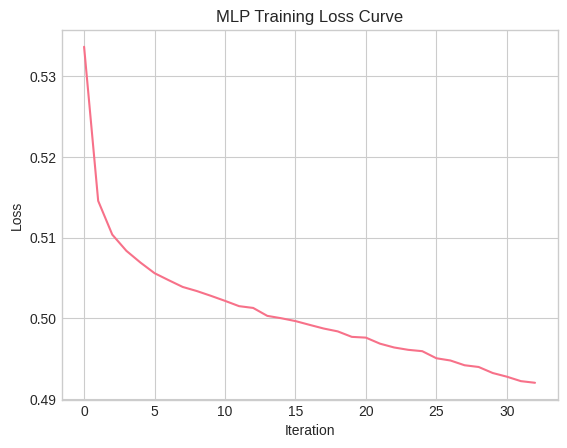

In [44]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Convert types
snapshots_hist['snapshot_date'] = pd.to_datetime(snapshots_hist['snapshot_date'], errors='coerce')
snapshots_hist['gmm_cluster'] = snapshots_hist['gmm_cluster'].astype(str)

# 1. Time-based split
cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()

# 2. Define feature set
drop_cols = ['snapshot_date', 'label']  # drop only what's present
feature_cols = [c for c in snapshots_hist.columns if c not in drop_cols]

X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
y_train = train_df['label']
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
y_test  = test_df['label']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 3. MLP pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        early_stopping=True,
        validation_fraction=0.1,
        alpha=0.001,
        max_iter=200,
        random_state=42
    ))
])

# 4. Train
pipeline.fit(X_train, y_train)

# 5. Predict and evaluate
y_prob_mlp = pipeline.predict_proba(X_test)[:, 1]
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)
prec_mlp, rec_mlp, _ = precision_recall_curve(y_test, y_prob_mlp)
pr_auc_mlp = auc(rec_mlp, prec_mlp)

print(f"MLP Test ROC AUC: {roc_auc_mlp:.4f}")
print(f"MLP Test PR  AUC: {pr_auc_mlp:.4f}")

# 6. Loss curve
plt.plot(pipeline.named_steps['mlp'].loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Assume `model` is your trained LightGBM classifier,
# and X_test, y_test are your test features and labels.

# 1. Get predicted labels (using 0.5 threshold)
y_pred = model.predict(X_test)

# 2. Calculate precision, recall, and F1 for the positive “dropout” class
precision = precision_score(y_test, y_pred, pos_label=1)
recall    = recall_score   (y_test, y_pred, pos_label=1)
f1        = f1_score       (y_test, y_pred, pos_label=1)

print(f"Dropout class precision: {precision:.4f}")
print(f"Dropout class recall:    {recall:.4f}")
print(f"Dropout class F1-score:  {f1:.4f}")

# 3. (Optional) Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Active (0)','Dropped (1)']))


Dropout class precision: 0.7509
Dropout class recall:    0.8217
Dropout class F1-score:  0.7847

Classification Report:

              precision    recall  f1-score   support

  Active (0)       0.76      0.67      0.71     12505
 Dropped (1)       0.75      0.82      0.78     15128

    accuracy                           0.75     27633
   macro avg       0.75      0.75      0.75     27633
weighted avg       0.75      0.75      0.75     27633



#Finding Optimal Threshold


In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, classification_report

# Assume you already have:
# - model: your trained LightGBM (or any) classifier
# - X_test: test features
# - y_test: true labels for test set

# 1. Predict raw probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# 2. Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# 3. Find threshold that maximizes F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.nanargmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Optimal threshold for max F1: {best_threshold:.3f} (F1 = {best_f1:.3f})")

# 4. (Optional) Find threshold for a desired precision level
desired_precision = 0.80
# Only consider thresholds where precision >= desired_precision
valid = np.where(precision[:-1] >= desired_precision)[0]
if valid.size > 0:
    thresh_for_prec = thresholds[valid[0]]
    print(f"Threshold for precision ≥ {desired_precision:.2f}: {thresh_for_prec:.3f}")
else:
    print(f"No threshold achieves precision ≥ {desired_precision:.2f}")

# 5. Apply chosen threshold to get new binary predictions
# You can choose either best_threshold or thresh_for_prec
threshold = best_threshold
y_pred_adj = (y_prob >= threshold).astype(int)

# 6. Evaluate adjusted predictions
prec_adj = precision_score(y_test, y_pred_adj, pos_label=1)
rec_adj  = recall_score   (y_test, y_pred_adj, pos_label=1)
f1_adj   = f1_score       (y_test, y_pred_adj, pos_label=1)
print(f"\nAfter thresholding at {threshold:.3f}:")
print(f"Dropout precision: {prec_adj:.4f}")
print(f"Dropout recall:    {rec_adj:.4f}")
print(f"Dropout F1-score:  {f1_adj:.4f}")

# 7. Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adj, target_names=['Active (0)', 'Dropped (1)']))


Optimal threshold for max F1: 0.433 (F1 = 0.791)
Threshold for precision ≥ 0.80: 0.622

After thresholding at 0.433:
Dropout precision: 0.7278
Dropout recall:    0.8665
Dropout F1-score:  0.7911

Classification Report:
              precision    recall  f1-score   support

  Active (0)       0.79      0.61      0.69     12505
 Dropped (1)       0.73      0.87      0.79     15128

    accuracy                           0.75     27633
   macro avg       0.76      0.74      0.74     27633
weighted avg       0.76      0.75      0.74     27633



## Precision Recall Analysis

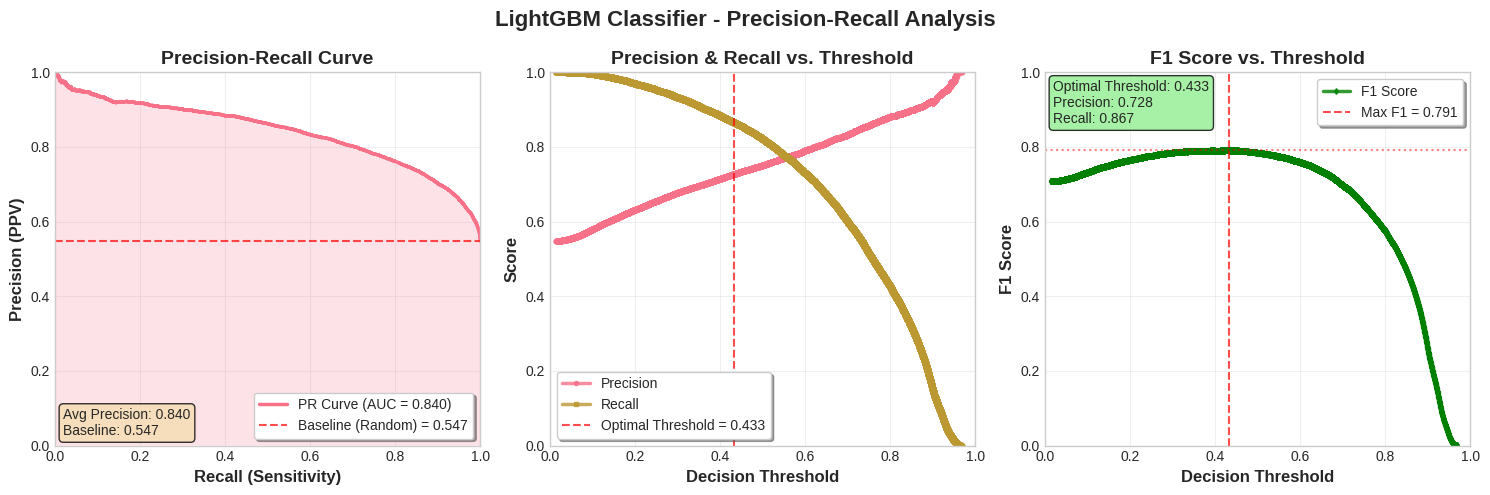


LightGBM Classifier - Performance Summary:
PR AUC Score: 0.8395
Average Precision Score: 0.8395
Baseline (Random Classifier): 0.5475
Optimal Threshold: 0.4327
  - Precision at optimal: 0.7278
  - Recall at optimal: 0.8665
  - F1 Score at optimal: 0.7911


In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def plot_precision_recall_analysis(y_test, y_prob, model_name="LightGBM", figsize=(15, 5)):
    """
    Create comprehensive precision-recall analysis with enhanced visualizations.

    Parameters:
    -----------
    y_test : array-like
        True binary labels
    y_prob : array-like
        Predicted probabilities for the positive class
    model_name : str
        Name of the model for plot titles
    figsize : tuple
        Figure size for the combined plot
    """

    # Compute precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

    # Calculate metrics
    pr_auc = auc(recall, precision)
    avg_precision = average_precision_score(y_test, y_prob)
    baseline = np.sum(y_test) / len(y_test)  # Random classifier performance

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(f'{model_name} - Precision-Recall Analysis', fontsize=16, fontweight='bold')

    # Plot 1: Precision-Recall Curve
    axes[0].plot(recall, precision, linewidth=2.5,
                label=f'PR Curve (AUC = {pr_auc:.3f})')
    axes[0].axhline(y=baseline, color='red', linestyle='--', alpha=0.7,
                   label=f'Baseline (Random) = {baseline:.3f}')
    axes[0].fill_between(recall, precision, alpha=0.2)
    axes[0].set_xlabel('Recall (Sensitivity)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Precision (PPV)', fontsize=12, fontweight='bold')
    axes[0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    axes[0].legend(loc='best', frameon=True, fancybox=True, shadow=True)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim([0, 1])
    axes[0].set_ylim([0, 1])

    # Add text box with additional metrics
    textstr = f'Avg Precision: {avg_precision:.3f}\nBaseline: {baseline:.3f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    axes[0].text(0.02, 0.02, textstr, transform=axes[0].transAxes, fontsize=10,
                verticalalignment='bottom', bbox=props)

    # Plot 2: Precision & Recall vs Threshold
    axes[1].plot(thresholds, precision[:-1], linewidth=2.5, marker='o',
                markersize=3, label='Precision', alpha=0.8)
    axes[1].plot(thresholds, recall[:-1], linewidth=2.5, marker='s',
                markersize=3, label='Recall', alpha=0.8)

    # Find optimal threshold (F1 score)
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    axes[1].axvline(x=optimal_threshold, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal Threshold = {optimal_threshold:.3f}')
    axes[1].set_xlabel('Decision Threshold', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
    axes[1].set_title('Precision & Recall vs. Threshold', fontsize=14, fontweight='bold')
    axes[1].legend(loc='best', frameon=True, fancybox=True, shadow=True)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim([0, 1])
    axes[1].set_ylim([0, 1])

    # Plot 3: F1 Score vs Threshold
    axes[2].plot(thresholds, f1_scores, linewidth=2.5, color='green',
                marker='d', markersize=3, label='F1 Score', alpha=0.8)
    axes[2].axvline(x=optimal_threshold, color='red', linestyle='--', alpha=0.7,
                   label=f'Max F1 = {f1_scores[optimal_idx]:.3f}')
    axes[2].axhline(y=f1_scores[optimal_idx], color='red', linestyle=':', alpha=0.5)
    axes[2].set_xlabel('Decision Threshold', fontsize=12, fontweight='bold')
    axes[2].set_ylabel('F1 Score', fontsize=12, fontweight='bold')
    axes[2].set_title('F1 Score vs. Threshold', fontsize=14, fontweight='bold')
    axes[2].legend(loc='best', frameon=True, fancybox=True, shadow=True)
    axes[2].grid(True, alpha=0.3)
    axes[2].set_xlim([0, 1])
    axes[2].set_ylim([0, 1])

    # Add text box with optimal metrics
    textstr = f'Optimal Threshold: {optimal_threshold:.3f}\nPrecision: {precision[:-1][optimal_idx]:.3f}\nRecall: {recall[:-1][optimal_idx]:.3f}'
    props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.8)
    axes[2].text(0.02, 0.98, textstr, transform=axes[2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\n{model_name} - Performance Summary:")
    print("=" * 50)
    print(f"PR AUC Score: {pr_auc:.4f}")
    print(f"Average Precision Score: {avg_precision:.4f}")
    print(f"Baseline (Random Classifier): {baseline:.4f}")
    print(f"Optimal Threshold: {optimal_threshold:.4f}")
    print(f"  - Precision at optimal: {precision[:-1][optimal_idx]:.4f}")
    print(f"  - Recall at optimal: {recall[:-1][optimal_idx]:.4f}")
    print(f"  - F1 Score at optimal: {f1_scores[optimal_idx]:.4f}")

    return {
        'pr_auc': pr_auc,
        'avg_precision': avg_precision,
        'optimal_threshold': optimal_threshold,
        'optimal_precision': precision[:-1][optimal_idx],
        'optimal_recall': recall[:-1][optimal_idx],
        'optimal_f1': f1_scores[optimal_idx]
    }

#Example usage:
#Assuming y_test and y_prob are defined from your LightGBM predictions
results = plot_precision_recall_analysis(y_test, y_prob, model_name="LightGBM Classifier")


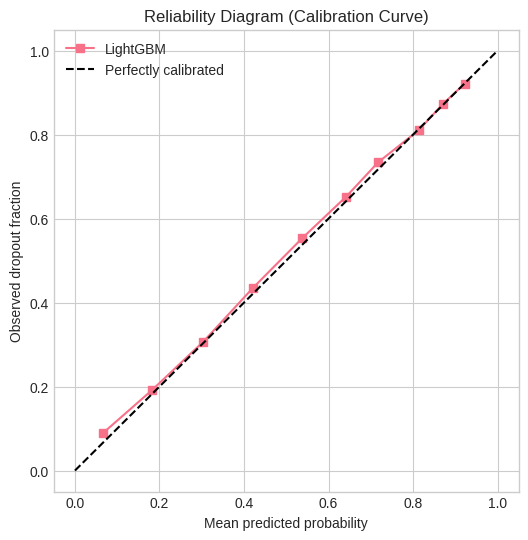

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 1) Get your test‐set probabilities and true labels:
y_prob = model.predict_proba(X_test)[:,1]
y_true = y_test.values

# 2) Compute calibration curve (fraction of positives per bin):
#    gives two arrays of length n_bins:
#    prob_true = observed dropout rate in each bin
#    prob_pred = mean predicted probability in each bin
prob_pred, prob_true = calibration_curve(y_true, y_prob,
                                         n_bins=10, strategy='quantile')

# 3) Plot
plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, 's-', label='LightGBM')
plt.plot([0,1], [0,1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Observed dropout fraction')
plt.title('Reliability Diagram (Calibration Curve)')
plt.legend()
plt.grid(True)
plt.show()


#Logistic Regression

In [49]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Convert types
snapshots_hist['snapshot_date'] = pd.to_datetime(snapshots_hist['snapshot_date'], errors='coerce')
snapshots_hist['gmm_cluster'] = snapshots_hist['gmm_cluster'].astype(str)

# 1. Split by time
cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()

# 2. Prepare features
drop_cols = ['snapshot_date', 'label']
feature_cols = [c for c in snapshots_hist.columns if c not in drop_cols]

X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
y_train = train_df['label']
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
y_test  = test_df['label']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 3. Pipeline: Scaling + Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    ))
])

# 4. Grid search for best C
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100]
}
tscv = TimeSeriesSplit(n_splits=3)

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# 5. Train
grid.fit(X_train, y_train)
print("Best CV AUC:", grid.best_score_)
print("Best C:", grid.best_params_['clf__C'])

# 6. Evaluate on test
best_model = grid.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f'Test ROC AUC: {roc_auc:.4f} | Test PR AUC: {pr_auc:.4f}')


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best CV AUC: 0.7923512816744944
Best C: 0.01
Test ROC AUC: 0.7944 | Test PR AUC: 0.8032


## Interpretability Of Logistic Regression


In [50]:
import pandas as pd
import numpy as np

# Define a function to extract interpretability metrics from the fitted logistic model
def extract_logistic_interpretability(grid, X_train):
    """
    Returns a DataFrame of the top 20 features by absolute coefficient,
    along with their coefficients and odds ratios.
    """
    # Extract the best logistic regression model from the pipeline
    best_pipeline = grid.best_estimator_
    logistic = best_pipeline.named_steps['clf']

    # Get feature names and coefficients
    feature_names = X_train.columns
    coefficients = logistic.coef_[0]

    # Build a DataFrame for interpretability
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients
    })

    # Add odds ratio and absolute coefficient for sorting
    coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
    coef_df['abs_coef'] = coef_df['coefficient'].abs()

    # Sort by absolute coefficient descending and return top 20
    return coef_df.sort_values('abs_coef', ascending=False).head(20).drop(columns=['abs_coef'])

# Example usage (run in your environment):
interpret_df = extract_logistic_interpretability(grid, X_train)
print(interpret_df)


                  feature  coefficient  odds_ratio
3   days_since_last_event     0.805686    2.238232
11           num_sessions    -0.468297    0.626068
16      n_unique_chapters     0.460157    1.584323
14        n_unique_topics     0.403928    1.497697
0         days_since_join     0.195746    1.216218
4    days_since_last_quiz     0.170085    1.185405
17        chapter_entropy    -0.157396    0.854366
21          gmm_cluster_1    -0.155923    0.855625
5      sum_component_time    -0.108470    0.897206
20  batch_avg_events_hist     0.104312    1.109947
22          gmm_cluster_2    -0.093667    0.910586
18      component_entropy    -0.088092    0.915676
15          topic_entropy     0.085456    1.089214
8     n_unique_components    -0.076088    0.926735
6      avg_component_time    -0.056845    0.944741
10                max_gap    -0.055048    0.946440
7           pct_completed    -0.046588    0.954481
12     pct_weekend_events    -0.045086    0.955915
9                mean_gap     0

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import pandas as pd

# 1. Initialize RandomForest with balanced class weights
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# 2. Train on the same X_train, y_train
rf.fit(X_train, y_train)

# 3. Predict probabilities on X_test
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# 4. Compute metrics
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc_rf = auc(rec_rf, prec_rf)

print(f"Random Forest Test ROC AUC: {roc_auc_rf:.4f}")
print(f"Random Forest Test PR  AUC: {pr_auc_rf:.4f}")

# 5. Feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
top20_rf = importances_rf.sort_values(ascending=False).head(20)

print("\nTop 20 Random Forest feature importances:")
print(top20_rf)


Random Forest Test ROC AUC: 0.8207
Random Forest Test PR  AUC: 0.8304

Top 20 Random Forest feature importances:
days_since_last_event    0.104000
days_since_last_quiz     0.100500
days_since_join          0.097080
batch_avg_events_hist    0.055625
sum_component_time       0.053964
avg_component_time       0.052766
topic_entropy            0.050390
chapter_entropy          0.047003
max_gap                  0.046540
component_entropy        0.044700
mean_gap                 0.042732
pct_completed            0.039573
total_quizzes            0.039148
total_events             0.038874
activity_trend           0.037612
n_unique_components      0.031056
num_sessions             0.030194
pct_weekend_events       0.029756
n_unique_chapters        0.029422
n_unique_topics          0.024119
dtype: float64


#Feature Importance -RF

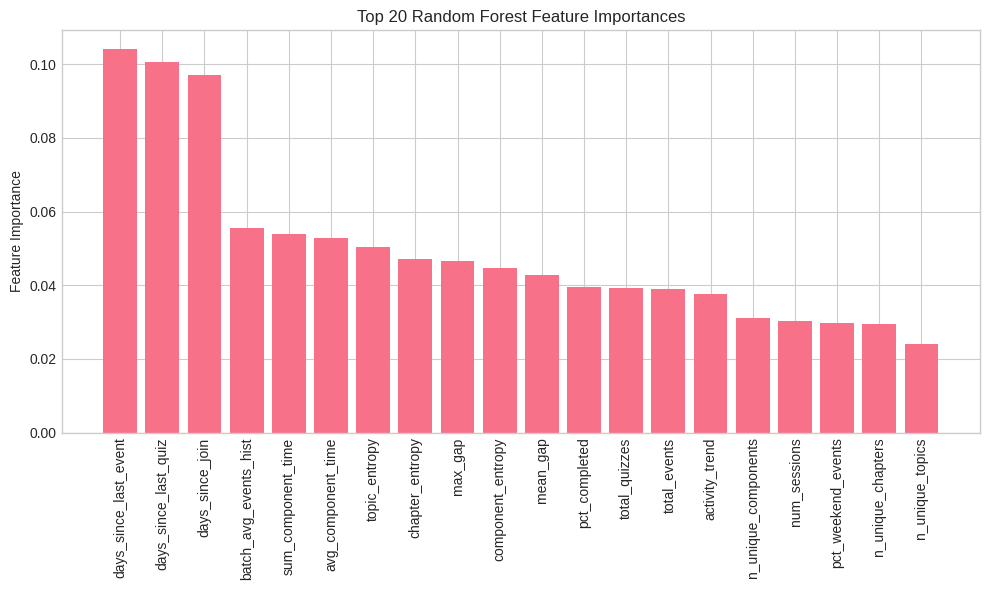

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rf, X_train are already defined in the environment
# Compute importances
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
top20_rf = importances_rf.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
features = top20_rf.index
values = top20_rf.values

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), features, rotation=90)
plt.ylabel("Feature Importance")
plt.title("Top 20 Random Forest Feature Importances")
plt.tight_layout()
plt.show()


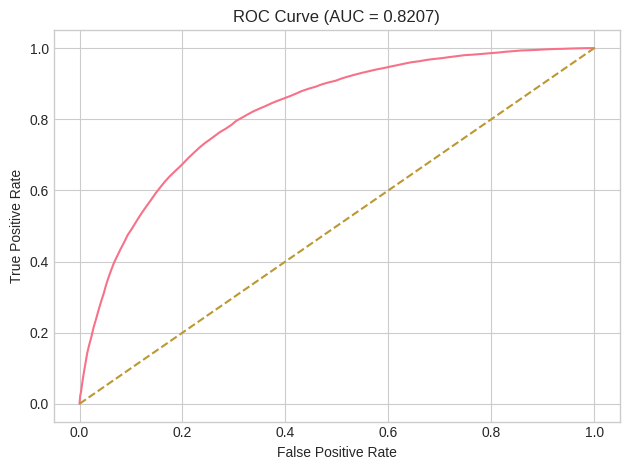

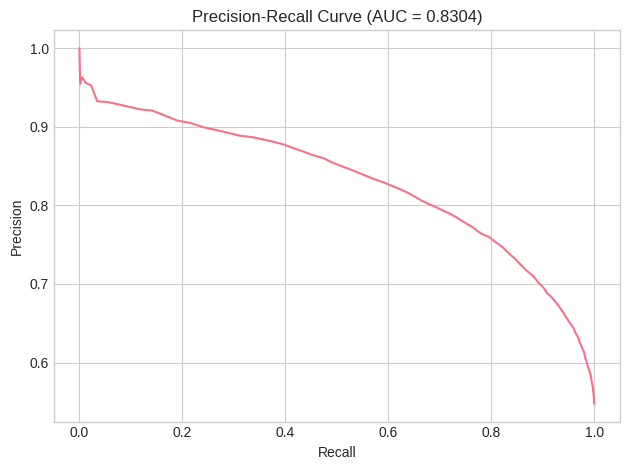

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Assuming y_test and y_prob_rf are already defined

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.4f})")
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AUC = {pr_auc:.4f})")
plt.tight_layout()
plt.show()


#XGBoost

In [54]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# 1. Load data and split (reuse your previous train/test split logic)
# snapshots = pd.read_csv(
#     '/mnt/data/snapshots_updated.csv',
#     parse_dates=['snapshot_date', 'user_joining_date']
# )
# cutoff = snapshots['snapshot_date'].quantile(0.8)
# train_df = snapshots[snapshots['snapshot_date'] <= cutoff].copy()
# test_df  = snapshots[snapshots['snapshot_date'] >  cutoff].copy()

# drop_cols = [
#     'user_id', 'snapshot_date', 'user_joining_date', 'label',
#     'batch_id', 'batch_dropout_rate', 'batch_avg_events'
# ]
# feature_cols = [c for c in snapshots.columns if c not in drop_cols]

# X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
# y_train = train_df['label']
# X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)
# y_test  = test_df['label']
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 2. Initialize XGBoost with class imbalance handling
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=neg/pos,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc',
    n_jobs=-1
)

# 3. Train with early stopping on a validation split from training data
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# 4. Predict and evaluate
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
pr_auc_xgb = auc(rec_xgb, prec_xgb)

print(f"XGBoost Test ROC AUC: {roc_auc_xgb:.4f}")
print(f"XGBoost Test PR AUC:  {pr_auc_xgb:.4f}")

# 5. Feature importances
importances_xgb = pd.Series(model_xgb.feature_importances_, index=X_train.columns)
top20_xgb = importances_xgb.sort_values(ascending=False).head(20)
print("\nTop 20 XGBoost feature importances:")
print(top20_xgb)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:44:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test ROC AUC: 0.8290
XGBoost Test PR AUC:  0.8406

Top 20 XGBoost feature importances:
days_since_last_event    0.473763
days_since_join          0.087677
num_sessions             0.085460
topic_entropy            0.050735
days_since_last_quiz     0.044230
max_gap                  0.030430
n_unique_topics          0.026152
n_unique_chapters        0.025681
sum_component_time       0.022260
chapter_entropy          0.018848
total_events             0.018112
mean_gap                 0.017735
activity_trend           0.013026
n_unique_components      0.012681
pct_completed            0.012318
pct_weekend_events       0.011275
batch_avg_events_hist    0.010765
gmm_cluster_2            0.009879
gmm_cluster_1            0.009856
avg_component_time       0.009647
dtype: float32


In [55]:
# Hypertuned Model
best_model = random_search.best_estimator_


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


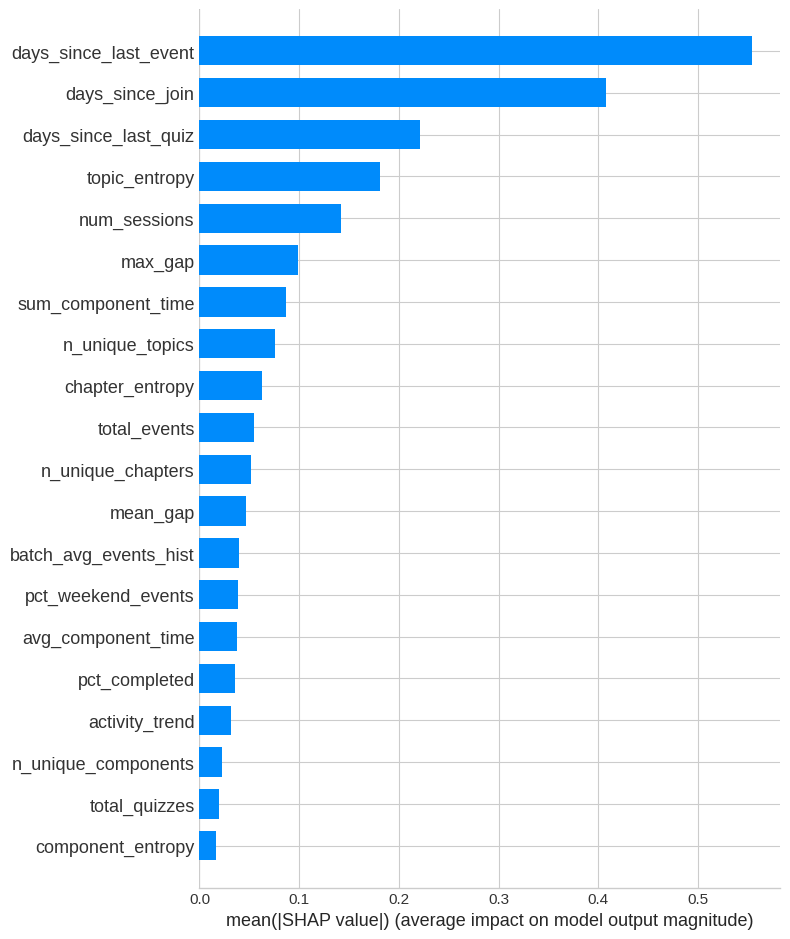

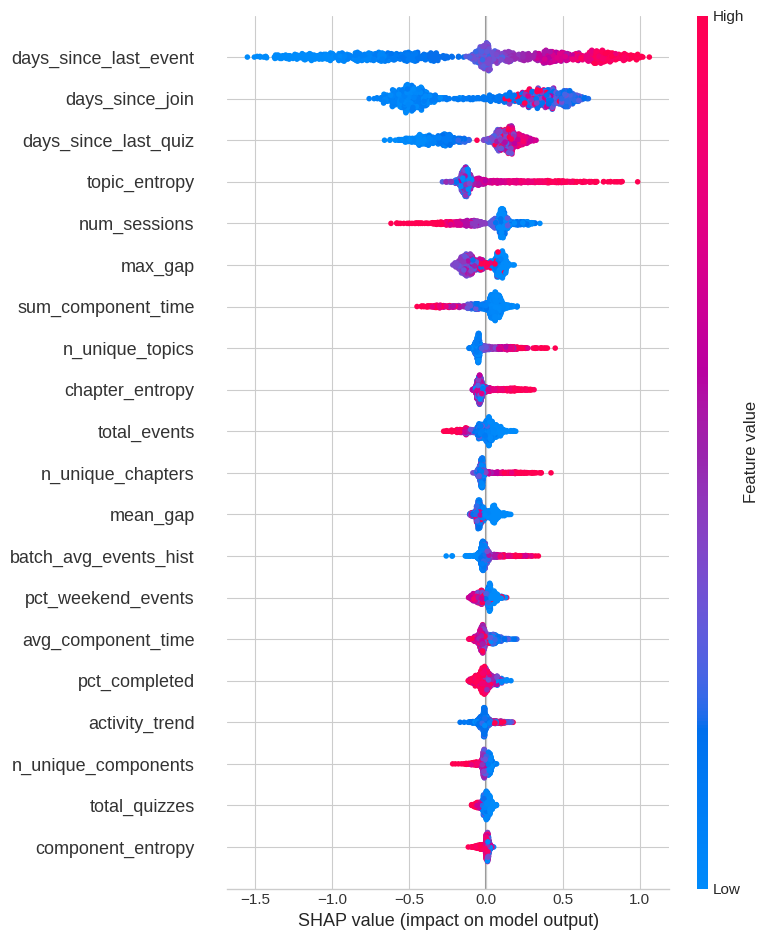

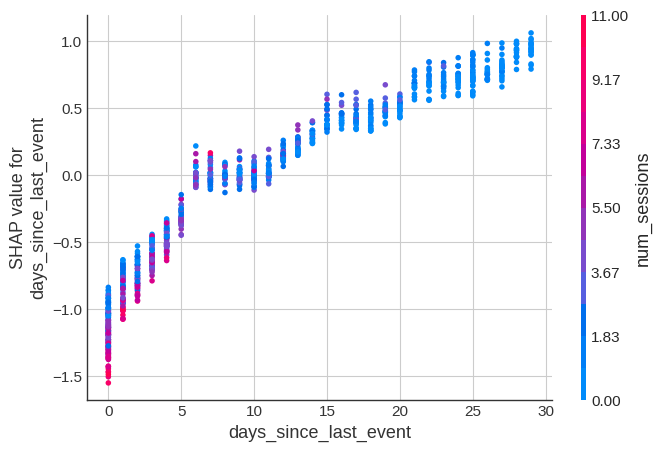

In [56]:
import shap
import matplotlib.pyplot as plt

# 1. Create a SHAP explainer for your tuned LightGBM model
explainer = shap.TreeExplainer(best_model)

# 2. Compute SHAP values on a sample of your test set
sample = X_test.sample(1000, random_state=42)
shap_values = explainer.shap_values(sample)

# 3. Global feature importance (mean absolute SHAP)
shap.summary_plot(shap_values, sample, plot_type="bar")

# 4. Detailed summary (beeswarm)
shap.summary_plot(shap_values, sample)

# 5. Partial dependence for a single feature
shap.dependence_plot("days_since_last_event", shap_values, sample)


#Segmentation

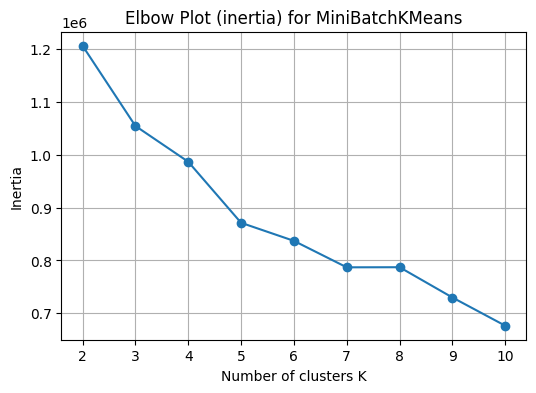

Sampled silhouette score (n=5000): 0.197
Cluster centroids (mean feature values):
   total_events  pct_completed  days_since_last_event  activity_trend  \
0    483.041776       0.888660               4.914454        2.455440   
1    101.111615       0.735799              19.172466        2.448222   
2   6633.688860       0.972722               6.181818       49.473406   
3     76.778761       0.692453               9.586665        0.791952   

   mean_gap  num_sessions  sum_component_time  avg_component_time  \
0  0.134400      3.960934        40407.420075           90.340546   
1  0.081792      0.533451         7653.407463           80.331400   
2  0.002247      5.540333       618293.195903           95.998664   
3  0.511777      1.165243         4694.707659           65.275611   

   n_unique_components  pct_weekend_events  
0            27.829706            0.213791  
1            12.389225            0.115149  
2            49.065301            0.270977  
3            11.326823    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1) Load and select features
df = snapshots_hist.copy()
features = [
    'total_events','pct_completed','days_since_last_event',
    'activity_trend','mean_gap','num_sessions',
    'sum_component_time','avg_component_time',
    'n_unique_components','pct_weekend_events'
]
X = df[features].fillna(0)

# 2) Scale once
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Elbow method: inertia vs K
inertia = []
Ks = list(range(2,11))
for k in Ks:
    mbk = MiniBatchKMeans(
        n_clusters=k,
        batch_size=1024,
        random_state=42,
        max_iter=100,
        n_init=1
    )
    mbk.fit(X_scaled)
    inertia.append(mbk.inertia_)

plt.figure(figsize=(6,4))
plt.plot(Ks, inertia, 'o-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Plot (inertia) for MiniBatchKMeans')
plt.grid(True)
plt.show()

# 4) Choose K from elbow plot (say K=4)
best_k = 4

# 5) Final clustering with MiniBatchKMeans
mbk_final = MiniBatchKMeans(
    n_clusters=best_k,
    batch_size=1024,
    random_state=42,
    max_iter=200,
    n_init=3
)
df['behavior_cluster'] = mbk_final.fit_predict(X_scaled)

# 6) (Optional) Quick silhouette on a sample for validation
sample_idx = np.random.choice(len(X_scaled), size=5000, replace=False)
sil = silhouette_score(
    X_scaled[sample_idx],
    df['behavior_cluster'].values[sample_idx]
)
print(f"Sampled silhouette score (n=5000): {sil:.3f}")

# 7) Inspect cluster centroids and sizes
centroids = scaler.inverse_transform(mbk_final.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
print("Cluster centroids (mean feature values):")
print(centroid_df)

print("\nCluster sizes:")
print(df['behavior_cluster'].value_counts().sort_index())


#Clustering With GMM

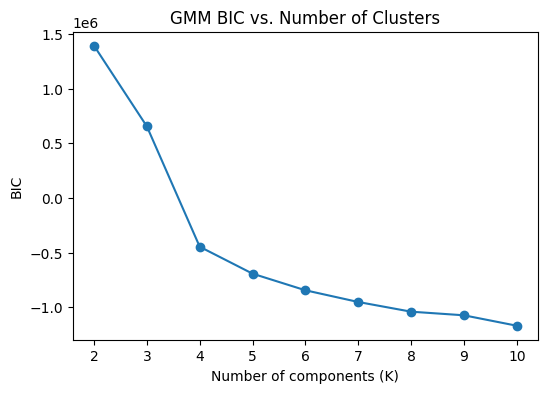

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 1) Load your snapshot data
# snapshots_hist = pd.read_csv('path/to/snapshots_hist.csv', parse_dates=['snapshot_date'])

# 2) Select the features you want to cluster on
features = [
    'total_events', 'pct_completed', 'days_since_last_event',
    'activity_trend', 'mean_gap', 'num_sessions',
    'sum_component_time', 'avg_component_time',
    'n_unique_components', 'pct_weekend_events'
]
X = snapshots_hist[features].fillna(0)

# 3) Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) (Optional) Choose the number of components using BIC
bics = []
Ks = range(2, 11)
for k in Ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

plt.figure(figsize=(6,4))
plt.plot(Ks, bics, marker='o')
plt.xlabel('Number of components (K)')
plt.ylabel('BIC')
plt.title('GMM BIC vs. Number of Clusters')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 1) Prepare & scale
X = snapshots_hist[features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

# 2) Fit GMM with K=3
gmm3 = GaussianMixture(n_components=3, covariance_type='full', random_state=42).fit(X_scaled)
labels3 = gmm3.predict(X_scaled)

# 3) Compute silhouette
sil3 = silhouette_score(X_scaled, labels3, sample_size=5000, random_state=42)
print(f"Silhouette for K=3: {sil3:.3f}")

# 4) Compare to K=4
gmm4 = GaussianMixture(n_components=4, covariance_type='full', random_state=42).fit(X_scaled)
labels4 = gmm4.predict(X_scaled)
sil4 = silhouette_score(X_scaled, labels4, sample_size=5000, random_state=42)
print(f"Silhouette for K=4: {sil4:.3f}")


Silhouette for K=3: 0.053
Silhouette for K=4: 0.050


In [ ]:
 #5) Fit the final GMM (
K_opt = 3
gmm_final = GaussianMixture(
    n_components=K_opt,
    covariance_type='full',
    random_state=42
).fit(X_scaled)

# 6) Assign clusters (hard labels) and (optionally) soft probabilities
snapshots_hist['gmm_cluster'] = gmm_final.predict(X_scaled)
proba = gmm_final.predict_proba(X_scaled)
# proba[i, j] = probability that sample i belongs to cluster j

# 7) Inspect cluster centroids in original feature space
centroids = scaler.inverse_transform(gmm_final.means_)
centroid_df = pd.DataFrame(centroids, columns=features)
print("Cluster centroids (mean feature values):\n", centroid_df)

# 8) Check sizes
print("\nCluster sizes:\n", snapshots_hist['gmm_cluster'].value_counts().sort_index())

Cluster centroids (mean feature values):
    total_events  pct_completed  days_since_last_event  activity_trend  \
0     15.237975       0.647918              13.674247        0.000678   
1   1700.545479       0.927352              10.266874       12.973424   
2    150.050271       0.846868               9.702635        0.268117   

   mean_gap  num_sessions  sum_component_time  avg_component_time  \
0  0.410068      0.702830         1221.034787           77.701906   
1  0.009173      3.280955       148716.556452           82.959506   
2  0.100786      2.794674        12272.107941           83.727836   

   n_unique_components  pct_weekend_events  
0             6.582583            0.278576  
1            36.210807            0.269342  
2            21.692288            0.271240  

Cluster sizes:
 gmm_cluster
0    49001
1    26864
2    65516
Name: count, dtype: int64


#Segment Specific Modeling

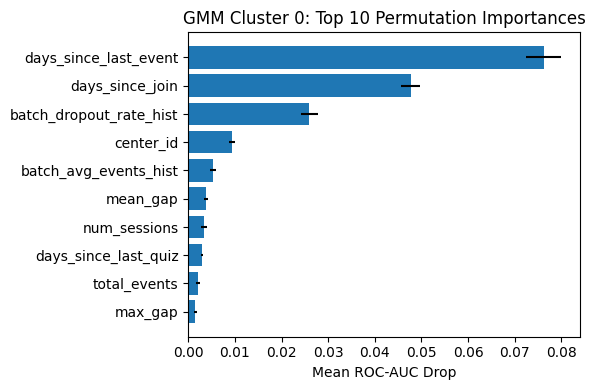

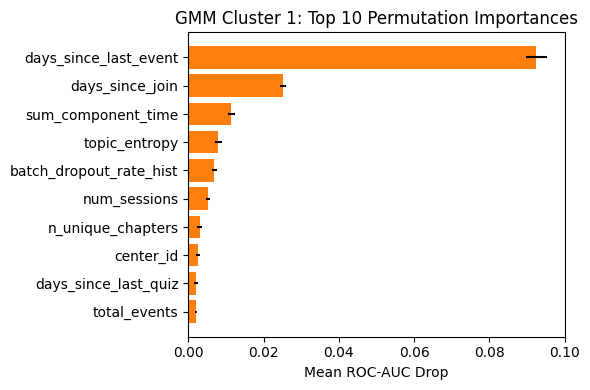

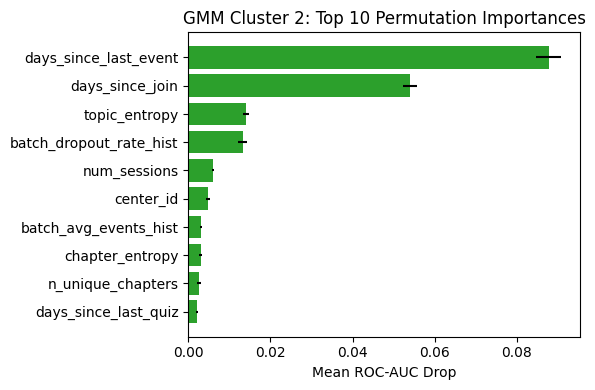

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import lightgbm as lgb
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


# --- 2) Train/test split by time ---
snapshots_hist['snapshot_date'] = pd.to_datetime(snapshots_hist['snapshot_date'], errors='coerce')

cutoff = snapshots_hist['snapshot_date'].quantile(0.8)
train_df = snapshots_hist[snapshots_hist['snapshot_date'] <= cutoff].copy()
test_df  = snapshots_hist[snapshots_hist['snapshot_date'] >  cutoff].copy()

feature_cols = [c for c in snapshots_hist.columns if c not in [
    'user_id','label','snapshot_date','gmm_cluster'
]]
# Align train/test feature matrices
X_train = pd.get_dummies(train_df[feature_cols].fillna(0), drop_first=True)
X_test  = pd.get_dummies(test_df[feature_cols].fillna(0), drop_first=True)
X_test  = X_test.reindex(columns=X_train.columns, fill_value=0)

y_train = train_df['label']
y_test  = test_df['label']

# Assumes `model` is your trained LightGBM on X_train, y_train
# model.fit(X_train, y_train)

# --- 3) Per-cluster permutation importances ---
def auc_scorer(estimator, X, y):
    y_prob = estimator.predict_proba(X)[:,1]
    return roc_auc_score(y, y_prob)

for c in sorted(test_df['gmm_cluster'].unique()):
    mask = test_df['gmm_cluster'] == c
    Xc, yc = X_test[mask], y_test[mask]
    if len(yc) < 50:
        print(f"Skipping cluster {c} (n={len(yc)})—too few samples.")
        continue

    perm = permutation_importance(
        model, Xc, yc,
        scoring=auc_scorer,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )

    imp_df = (
        pd.DataFrame({
            'feature': Xc.columns,
            'mean_auc_drop': perm.importances_mean,
            'std_auc_drop' : perm.importances_std
        })
        .sort_values('mean_auc_drop', ascending=False)
        .head(10)
        .reset_index(drop=True)
    )

    plt.figure(figsize=(6,4))
    plt.barh(
        imp_df['feature'][::-1],
        imp_df['mean_auc_drop'][::-1],
        xerr=imp_df['std_auc_drop'][::-1],
        color=f"C{c % 10}"
    )
    plt.xlabel('Mean ROC-AUC Drop')
    plt.title(f'GMM Cluster {c}: Top 10 Permutation Importances')
    plt.tight_layout()
    plt.show()

Cluster summary:
    gmm_cluster  n_snapshots  dropout_rate
0            0         9507      0.640265
1            1         5576      0.507174
2            2        12550      0.495060
Will analyze clusters: [0, 1, 2]

=== SHAP for GMM cluster 0 (n=9507) ===


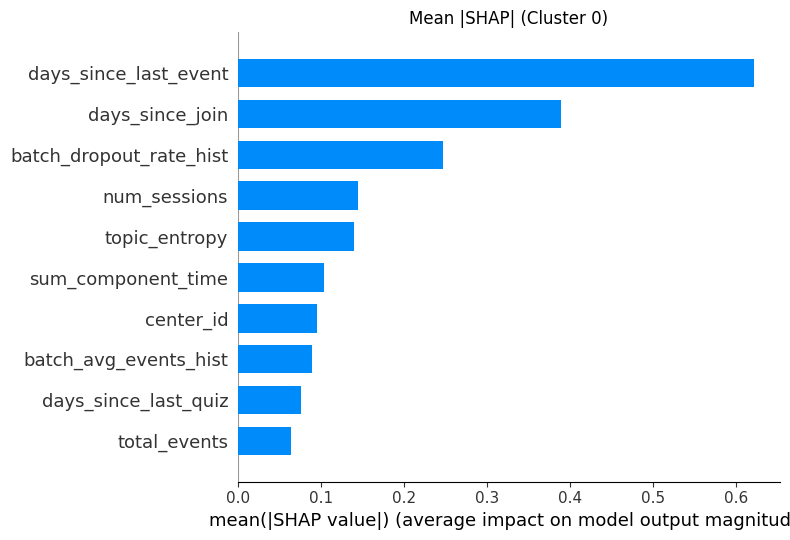

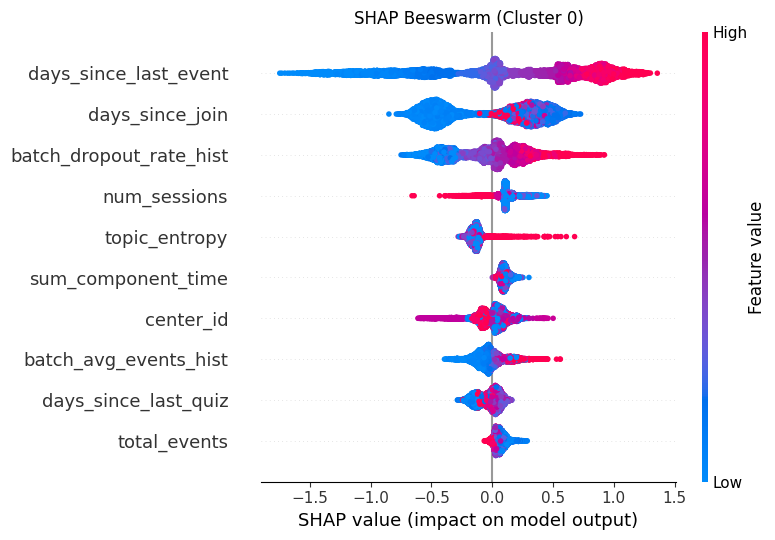


=== SHAP for GMM cluster 1 (n=5576) ===


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


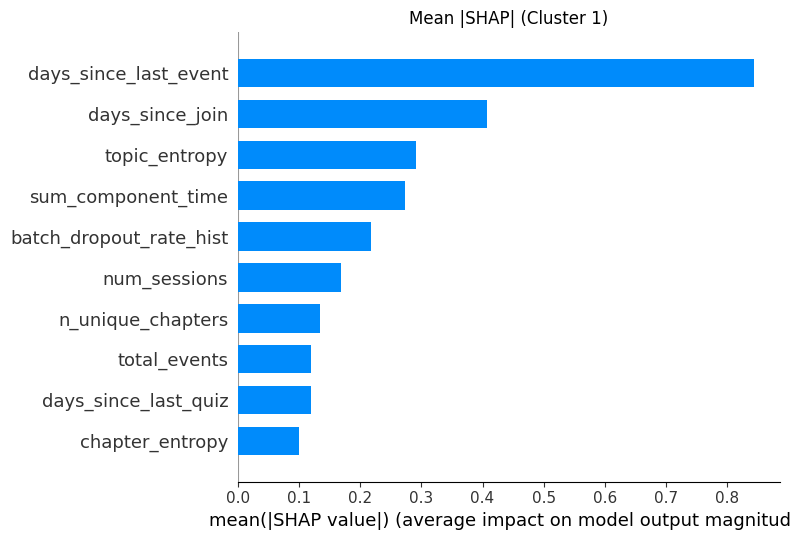

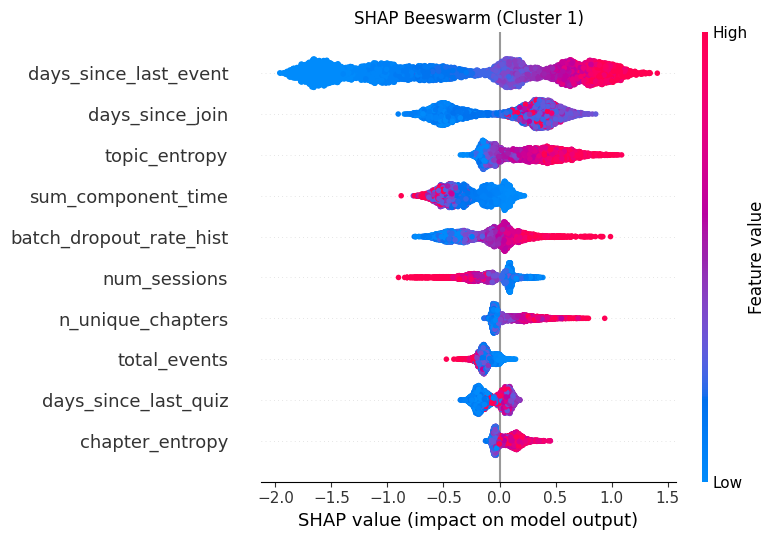


=== SHAP for GMM cluster 2 (n=12550) ===


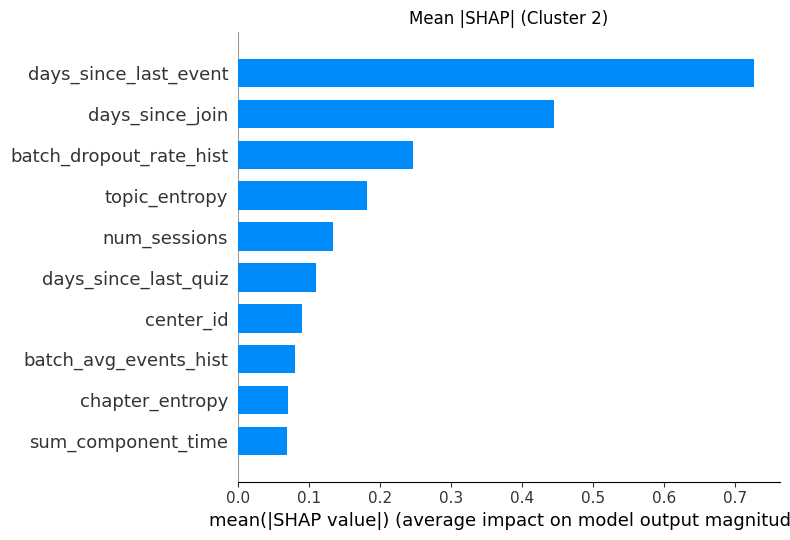

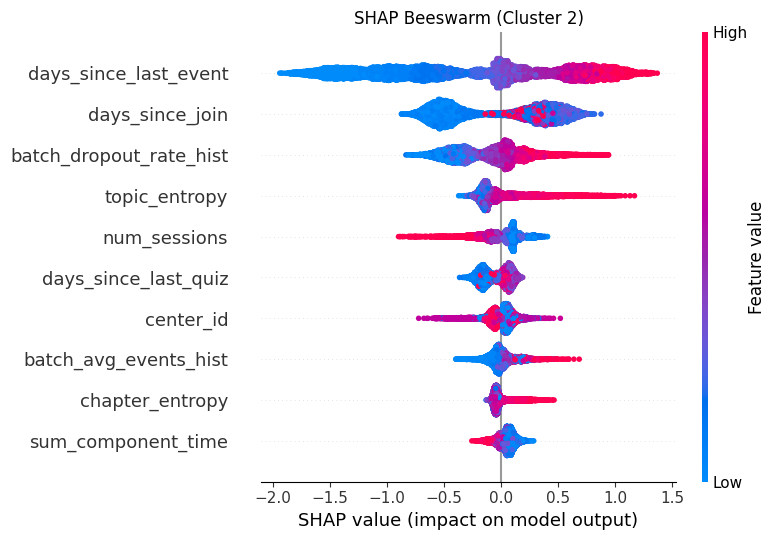

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- Assumptions: ---
#   snapshots_hist already has a 'gmm_cluster' column from your GMM fit above.
#   X_test, y_test are your test‐split features & labels, indexed the same as snapshots_hist.
#   model is your trained LightGBM.

# 1) Build a small DataFrame aligned with X_test
test_df = snapshots_hist.loc[X_test.index]

# 2) SEGMENTATION: just inspect cluster sizes & dropout rates
seg_metrics = test_df.groupby('gmm_cluster').agg(
    n_snapshots  = ('label','size'),
    dropout_rate = ('label','mean')
).reset_index()
print("Cluster summary:\n", seg_metrics)

# 3) TARGETING: here we take \emph{all} clusters (0,1,2) that we already created
target_clusters = seg_metrics['gmm_cluster'].tolist()
print("Will analyze clusters:", target_clusters)

# 4) POSITIONING: per-cluster SHAP
explainer   = shap.TreeExplainer(model)
# note: we pass the list-of-arrays into summary_plot, so no manual slicing needed
for c in target_clusters:
    mask = test_df['gmm_cluster'] == c
    Xc   = X_test.loc[mask]
    if len(Xc) < 50:
        print(f"Skipping cluster {c} (n={len(Xc)}) — too small")
        continue

    print(f"\n=== SHAP for GMM cluster {c} (n={len(Xc)}) ===")
    shap_vals_c = explainer.shap_values(Xc)  # returns [shap_class0, shap_class1]

     # 4a) mean |SHAP| bar plot
    plt.figure(figsize=(6, 4)) # Reduced figure size
    shap.summary_plot(
        shap_vals_c,
        Xc,
        plot_type="bar",
        max_display=10,
        show=False
    )
    plt.title(f"Mean |SHAP| (Cluster {c})")
    plt.tight_layout()
    plt.show()
    # 4b) beeswarm
    plt.figure(figsize=(8, 5)) # Reduced figure size, adjusted aspect ratio
    shap.summary_plot(
        shap_vals_c,
        Xc,
        max_display=10,
        show=False
    )
    plt.title(f"SHAP Beeswarm (Cluster {c})")
    plt.tight_layout()
    plt.show()




In [ ]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# Assumes snapshots_hist, train_df, test_df, X_train, X_test, y_train, y_test, feature_cols are already defined

# 1) Compute cluster sizes and shares
total_snaps = len(snapshots_hist)
cluster_counts = snapshots_hist['gmm_cluster'].value_counts().sort_index()
cluster_shares = (cluster_counts / total_snaps * 100).round(1)
segment_sizes_df = pd.DataFrame({
    'cluster': cluster_counts.index,
    'size': cluster_counts.values,
    'share_pct': cluster_shares.values
})
print("Cluster sizes and shares:\n", segment_sizes_df)

# 2) Train & evaluate a separate LightGBM for each cluster
results = []
for c in segment_sizes_df['cluster']:
    # Mask train/test by cluster
    tr_mask = train_df['gmm_cluster'] == c
    te_mask = test_df['gmm_cluster'] == c

    Xc_train = X_train.loc[tr_mask]
    yc_train = y_train.loc[tr_mask]
    Xc_test  = X_test.loc[te_mask]
    yc_test  = y_test.loc[te_mask]

    # Skip small test sets
    if len(yc_test) < 20:
        print(f"Skipping cluster {c}: only {len(yc_test)} test snapshots.")
        continue

    # Instantiate LightGBM with tuned hyperparameters
    model_c = LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=20,
        num_leaves=100,
        min_child_samples=30,
        subsample=0.8,
        colsample_bytree=0.6,
        reg_alpha=1.0,
        reg_lambda=0.0,
        random_state=42
    )

    # Train
    model_c.fit(Xc_train, yc_train)

    # Predict and evaluate
    y_prob = model_c.predict_proba(Xc_test)[:, 1]
    auc = roc_auc_score(yc_test, y_prob)

    results.append({
        'cluster': c,
        'size': segment_sizes_df.loc[segment_sizes_df['cluster'] == c, 'size'].values[0],
        'share_pct': segment_sizes_df.loc[segment_sizes_df['cluster'] == c, 'share_pct'].values[0],
        'roc_auc': round(auc, 4)
    })

segment_eval_df = pd.DataFrame(results).sort_values('cluster').reset_index(drop=True)
print("\nSegment-level ROC AUC evaluation:\n", segment_eval_df)


Cluster sizes and shares:
    cluster   size  share_pct
0        0  49001       34.7
1        1  26864       19.0
2        2  65516       46.3
[LightGBM] [Info] Number of positive: 26028, number of negative: 13466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3620
[LightGBM] [Info] Number of data points in the train set: 39494, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.659037 -> initscore=0.659005
[LightGBM] [Info] Start training from score 0.659005
[LightGBM] [Info] Number of positive: 12295, number of negative: 8993
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4095
[LightGBM] [Info] Number of data points in the train set: 21288, number of used features: 23
[Light

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


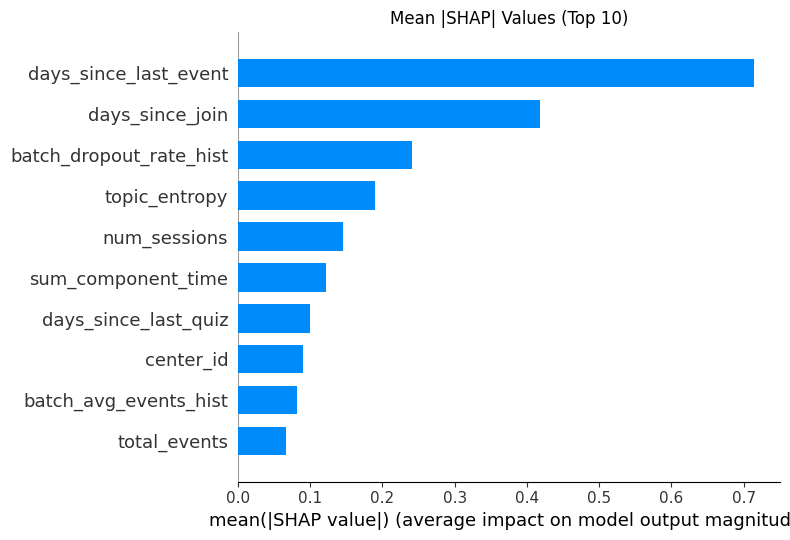

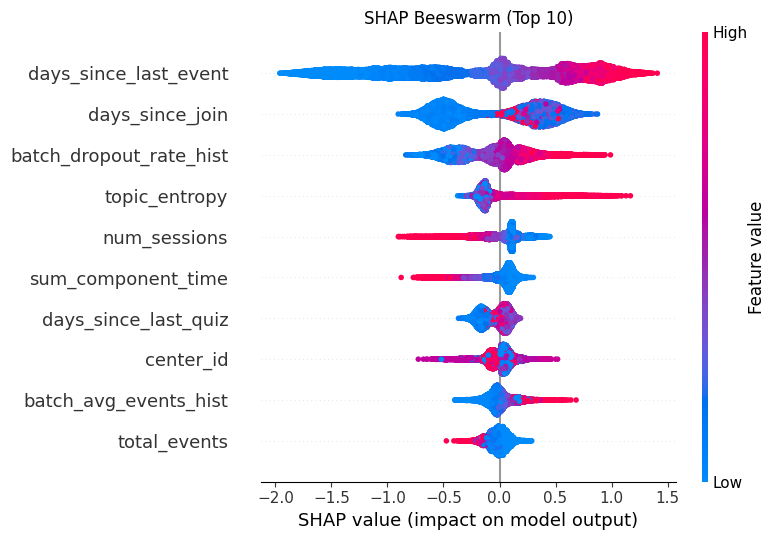

<Figure size 800x600 with 0 Axes>

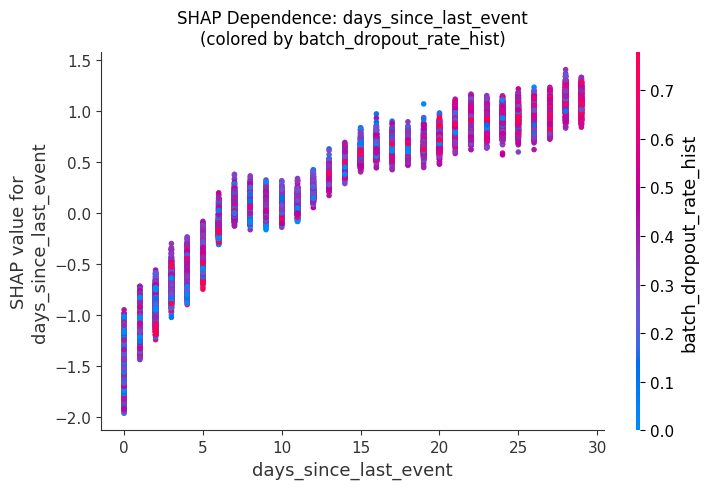

<Figure size 800x600 with 0 Axes>

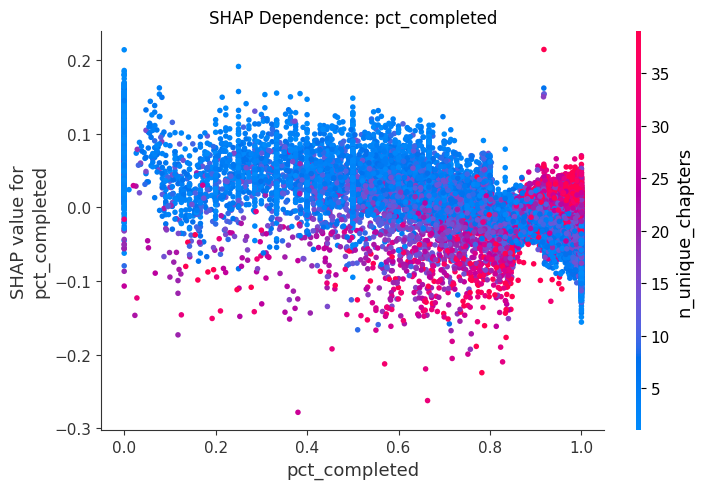

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. Create SHAP explainer
explainer = shap.TreeExplainer(model)

# 2. Sample
sample = X_test
shap_values = explainer.shap_values(sample)

# 3. Mean |SHAP| bar plot
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values, sample, plot_type="bar", max_display=10, show=False)
plt.title("Mean |SHAP| Values (Top 10)")
plt.tight_layout()
plt.show()

# 4. Beeswarm summary plot
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values, sample, max_display=10, show=False)
plt.title("SHAP Beeswarm (Top 10)")
plt.tight_layout()
plt.show()

# 5. Dependence: recency colored by cohort risk
plt.figure(figsize=(8,6))
shap.dependence_plot(
    "days_since_last_event",
    shap_values,
    sample,
    interaction_index="batch_dropout_rate_hist",
    show=False
)
plt.title("SHAP Dependence: days_since_last_event\n(colored by batch_dropout_rate_hist)")
plt.tight_layout()
plt.show()

# 6. Dependence: completion rate
plt.figure(figsize=(8,6))
shap.dependence_plot("pct_completed", shap_values, sample, show=False)
plt.title("SHAP Dependence: pct_completed")
plt.tight_layout()
plt.show()




In [ ]:
import nbformat
import base64

# Paths
notebook_path = '/content/drive/MyDrive/Colab Notebooks/Fresh.ipynb'
html_path = '/content/output_from_52_to_57.html'
pdf_path = '/content/output_from_52_to_57.pdf'

html_output = ["<html><body><h1>Notebook Output (Cells 52–57)</h1>"]

# Load notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Collect content from cell 52 to 57
for i, cell in enumerate(nb.cells):
    if i < 56 or i > 61:
        continue

    if cell.cell_type == 'code':
        html_output.append(f"<h2>Output from Cell {i + 1}</h2>")
        outputs = cell.get('outputs', [])
        for output in outputs:
            if output.output_type == 'stream':
                text = output.get('text', '').strip().replace('\n', '<br>')
                html_output.append(f"<pre>{text}</pre>")
            elif output.output_type in {'execute_result', 'display_data'}:
                data = output.get('data', {})
                if 'text/plain' in data:
                    html_output.append(f"<pre>{data['text/plain'].strip()}</pre>")
                if 'image/png' in data:
                    img_data = data['image/png']
                    html_output.append(f'<img src="data:image/png;base64,{img_data}" width="600"/>')
            elif output.output_type == 'error':
                html_output.append("<pre>" + '\n'.join(output.get('traceback', [])) + "</pre>")

html_output.append("</body></html>")

# Save to HTML file
with open(html_path, 'w', encoding='utf-8') as f:
    f.write('\n'.join(html_output))


Segment summary metrics:
    gmm_cluster  n_snapshots  dropout_rate   avg_events  avg_sessions  \
0            0         9507      0.640265    15.869675      0.743347   
1            1         5576      0.507174  1878.832317      3.682927   
2            2        12550      0.495060   152.211873      2.851713   

   avg_completion  
0        0.636665  
1        0.927497  
2        0.841665  

Target segments (dropout_rate ≥ 0.57): [0]


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(



=== SHAP summary for GMM cluster 0 ===


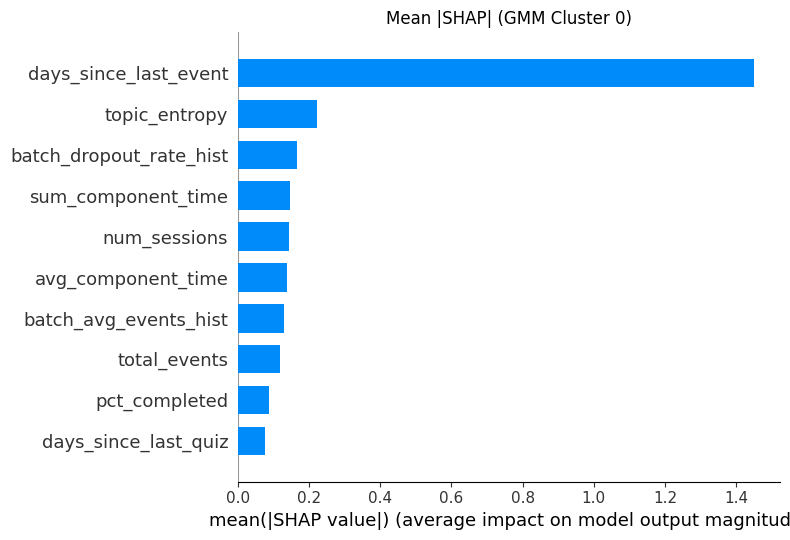

AssertionError: Feature and SHAP matrices must have the same number of rows!

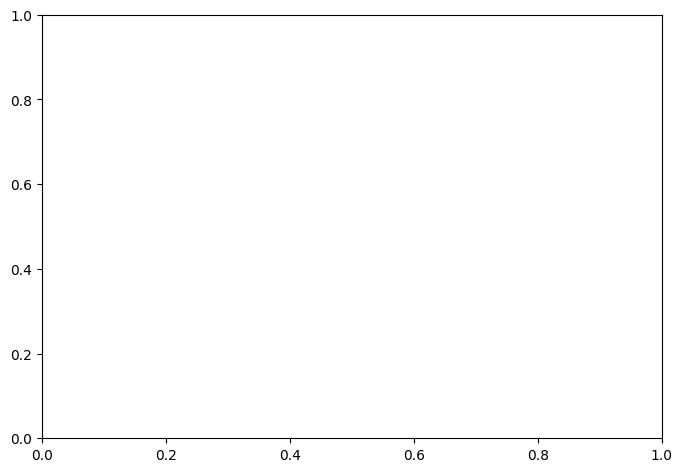

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

# --- Assumptions ---
# snapshots_hist: full DataFrame including 'gmm_cluster', 'label', and features
# model: trained LightGBM classifier
# X_test, y_test: test‐set features & labels (aligned index and columns)

# 1) Build a test‐split DataFrame aligned with X_test
test_df = snapshots_hist.loc[X_test.index]

# 2) SEGMENTATION: summarize each cluster
seg_metrics = test_df.groupby('gmm_cluster').agg(
    n_snapshots=('label', 'count'),
    dropout_rate=('label', 'mean'),
    avg_events=('total_events', 'mean'),
    avg_sessions=('num_sessions', 'mean'),
    avg_completion=('pct_completed', 'mean')
).reset_index()
print("Segment summary metrics:\n", seg_metrics)

# 3) TARGETING: pick top‐risk clusters (top 25% by dropout_rate)
risk_threshold = seg_metrics['dropout_rate'].quantile(0.75)
target_clusters = seg_metrics.loc[
    seg_metrics['dropout_rate'] >= risk_threshold,
    'gmm_cluster'
].tolist()
print(f"\nTarget segments (dropout_rate ≥ {risk_threshold:.2f}): {target_clusters}")

# 4) POSITIONING: Compute SHAP values *per cluster* for target clusters

# Initialize the SHAP explainer once
explainer = shap.TreeExplainer(model)

# 5) Per‐cluster SHAP plots for target clusters
for c in sorted(target_clusters): # Iterate through sorted target clusters
    # Create mask based on the test_df index (which is aligned with X_test)
    mask = (test_df['gmm_cluster'] == c)

    # Select data for the current cluster using the mask
    Xc_df   = X_test.loc[mask] # Keep DataFrame for feature names
    yc   = y_test.loc[mask]

    # Add a check for sufficient samples for SHAP plotting
    if len(Xc_df) < 2:
        print(f"Skipping SHAP plots for cluster {c} (n={len(Xc_df)})—too few samples.")
        continue

    # Convert features to NumPy array for SHAP computation and plotting
    Xc_numpy = Xc_df.values

    # Compute SHAP values specifically for this cluster's data (NumPy array)
    # For binary classification, explainer.shap_values returns a list of arrays
    shap_vals_cluster_list = explainer.shap_values(Xc_numpy)
    # We need the SHAP values for the positive class (class 1)
    vals = shap_vals_cluster_list[1] # This should be a matrix (n_samples_in_cluster, n_features)

    # Ensure vals is a 2D array in case of unexpected behavior with single samples
    if vals.ndim == 1:
        vals = vals.reshape(1, -1)


    print(f"\n=== SHAP summary for GMM cluster {c} ===")
    # bar plot of mean absolute SHAP
    plt.figure(figsize=(6,4))
    shap.summary_plot(
        vals,
        Xc_numpy, # Use the NumPy array for features
        plot_type="bar",
        max_display=10,
        show=False,
        feature_names=Xc_df.columns.tolist() # Pass feature names explicitly
    )
    plt.title(f"Mean |SHAP| (GMM Cluster {c})")
    plt.tight_layout()
    plt.show()

    # beeswarm plot
    plt.figure(figsize=(6,4))
    shap.summary_plot(
        vals,
        Xc_numpy, # Use the NumPy array for features
        max_display=10,
        show=False,
        feature_names=Xc_df.columns.tolist() # Pass feature names explicitly
    )
    plt.title(f"SHAP Beeswarm (GMM Cluster {c})")
    plt.tight_layout()
    plt.show()

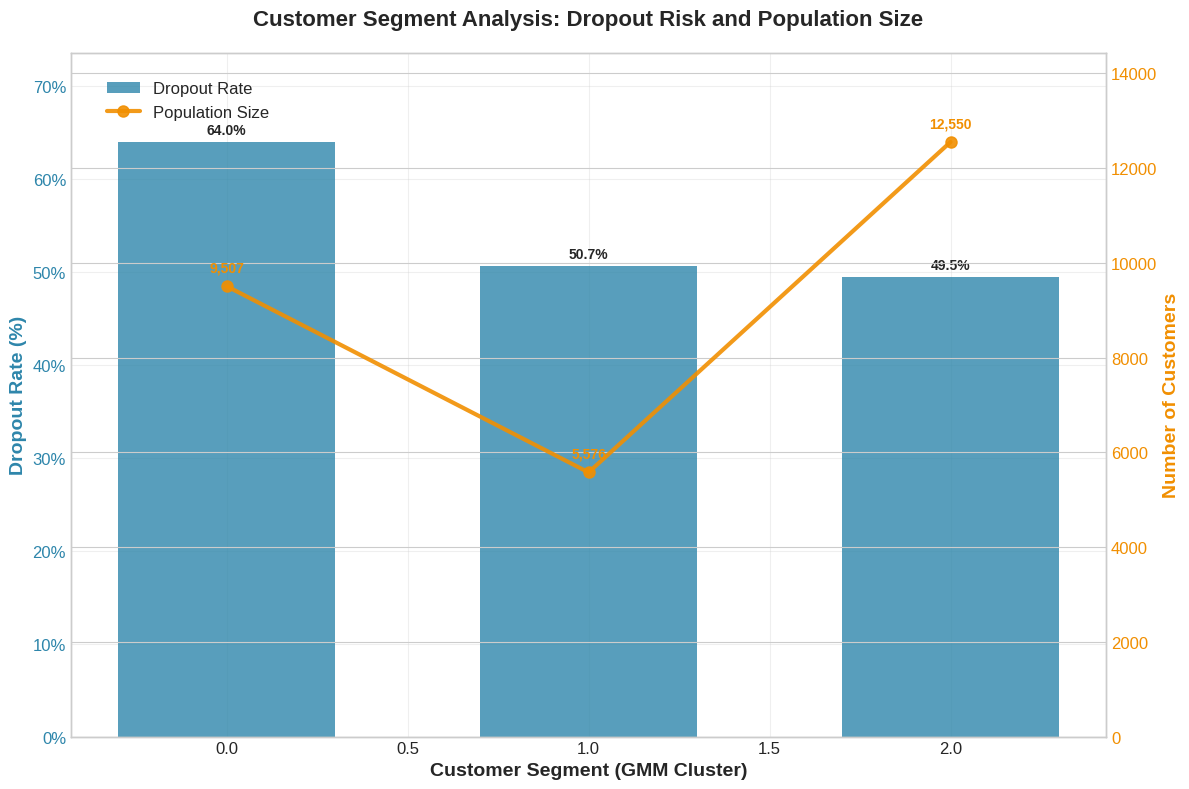

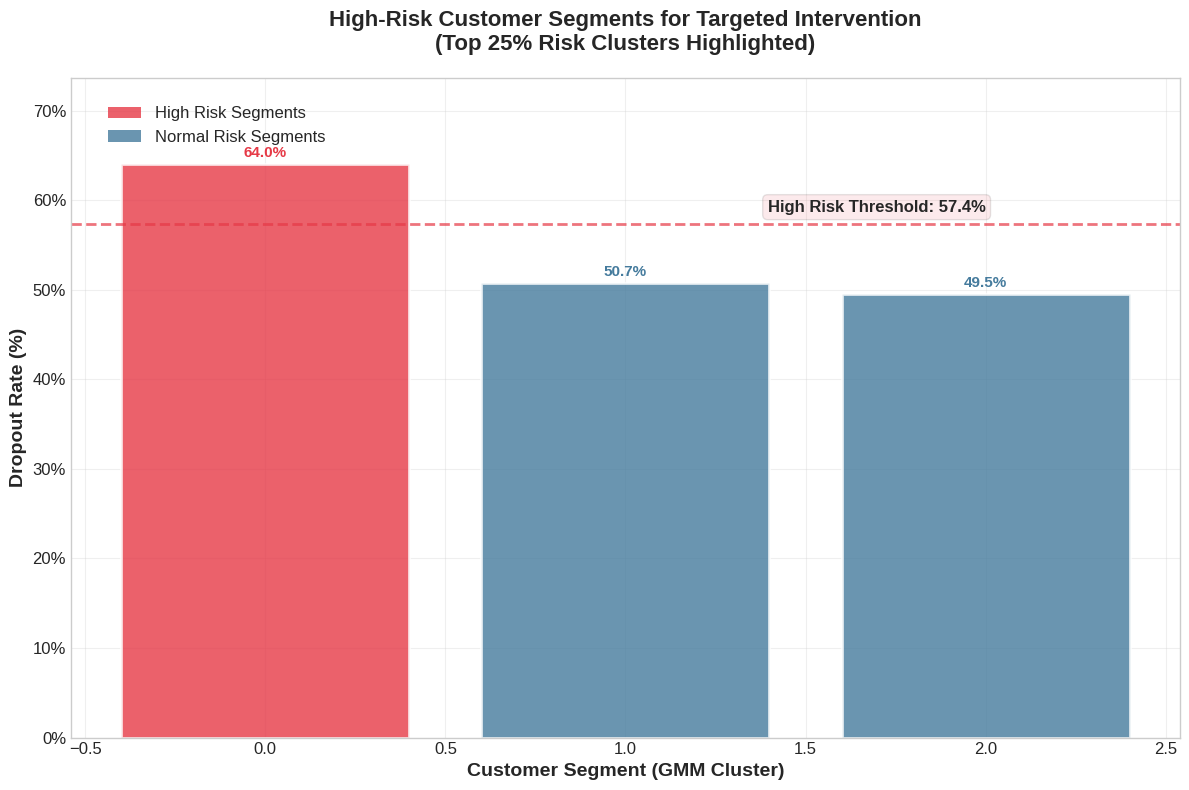

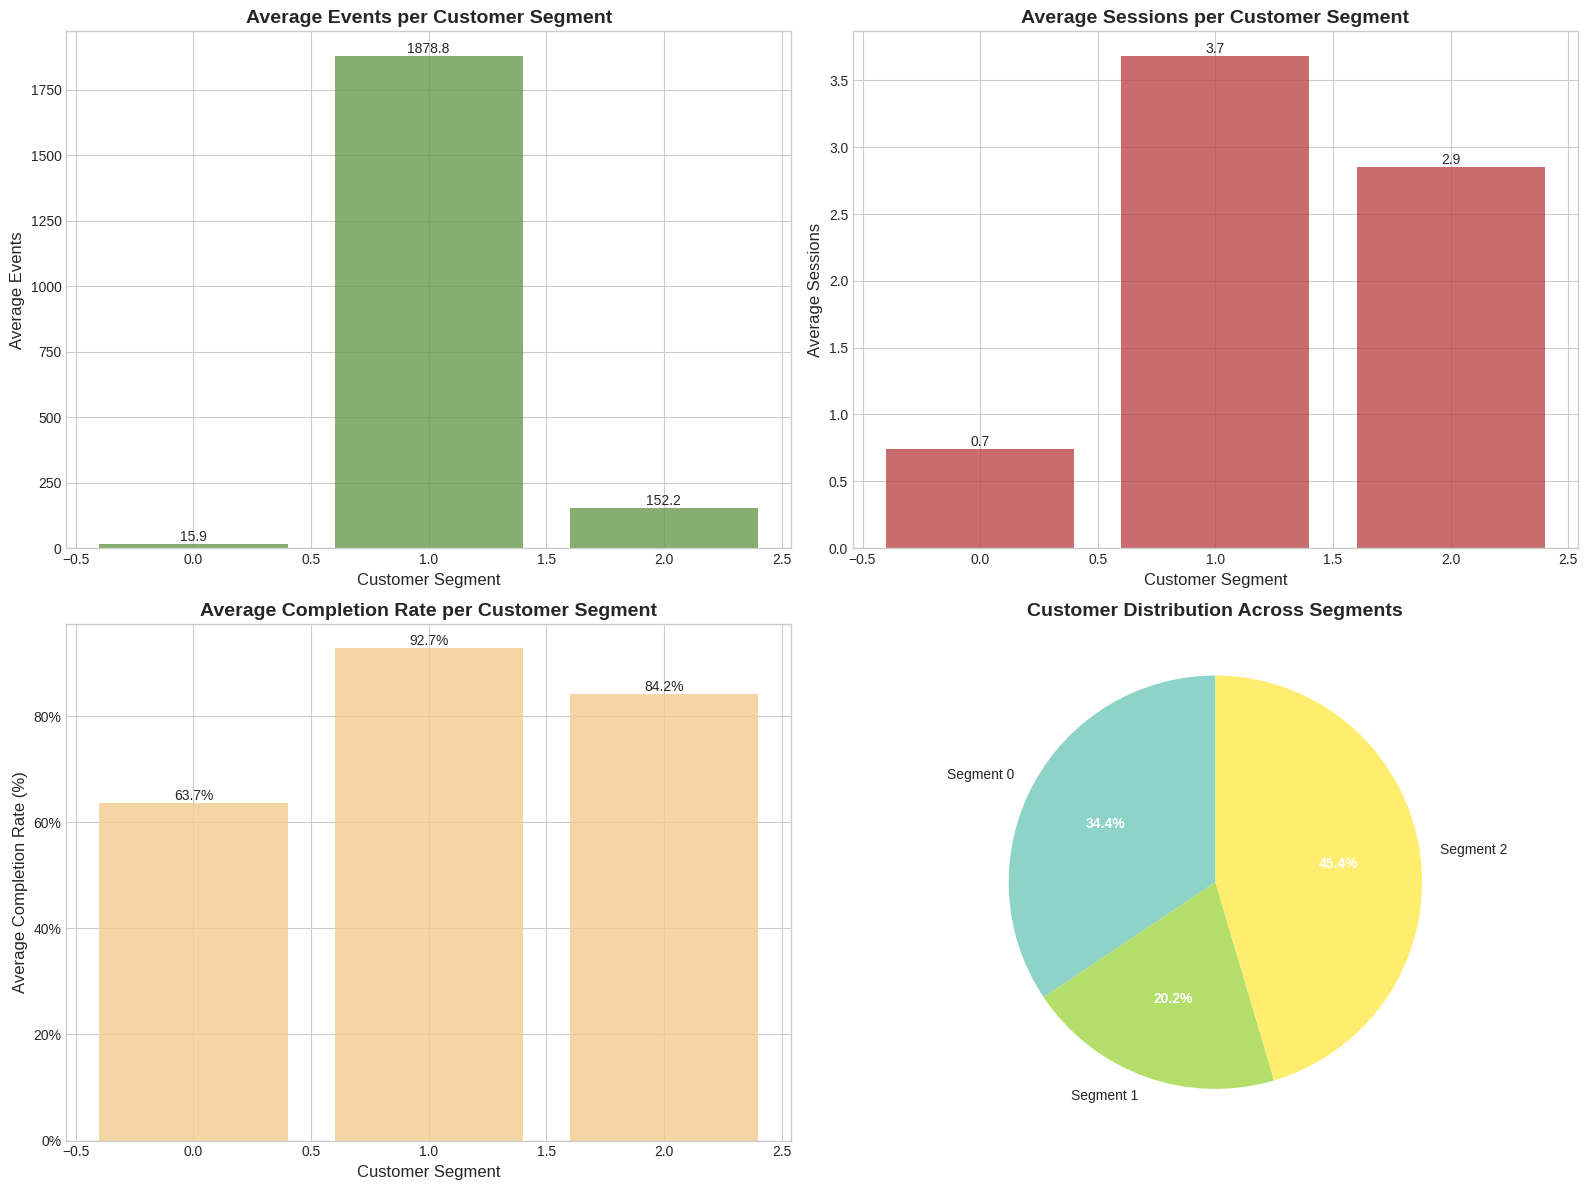


CUSTOMER SEGMENT ANALYSIS SUMMARY
Total Customers Analyzed: 27,633
Number of Segments: 3
Overall Dropout Rate: 54.7%
High-Risk Threshold (75th percentile): 57.4%
Number of High-Risk Segments: 1
Customers in High-Risk Segments: 9,507

DETAILED SEGMENT BREAKDOWN:
--------------------------------------------------------------------------------
 Segment Risk Level  Customers Dropout Rate  Avg Events  Avg Sessions  Avg Completion
       0  HIGH RISK       9507        64.0%        15.9           0.7             0.6
       1     NORMAL       5576        50.7%      1878.8           3.7             0.9
       2     NORMAL      12550        49.5%       152.2           2.9             0.8


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings('ignore')

# Set style for professional appearance
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Assumptions:
# - snapshots_hist with 'gmm_cluster', 'label', features
# - model: tuned LightGBM stored in `model`
# - X_test, y_test aligned with snapshots_hist
# - shap_explainer = shap.TreeExplainer(model)

# 1) Compute segment summary metrics
test_df = snapshots_hist.loc[X_test.index]
seg_metrics = test_df.groupby('gmm_cluster').agg(
    n_snapshots=('label','size'),
    dropout_rate=('label','mean'),
    avg_events=('total_events','mean'),
    avg_sessions=('num_sessions','mean'),
    avg_completion=('pct_completed','mean')
).reset_index()

# Sort by dropout rate for better visualization
seg_metrics = seg_metrics.sort_values('dropout_rate', ascending=False)

# 2) Enhanced segmentation visualization: dropout rate & cluster size
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create bars for dropout rate
bars1 = ax1.bar(seg_metrics['gmm_cluster'], seg_metrics['dropout_rate'],
                color='#2E86AB', alpha=0.8, label='Dropout Rate', width=0.6)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configure primary y-axis
ax1.set_ylabel('Dropout Rate (%)', fontsize=14, fontweight='bold', color='#2E86AB')
ax1.set_xlabel('Customer Segment (GMM Cluster)', fontsize=14, fontweight='bold')
ax1.set_title('Customer Segment Analysis: Dropout Risk and Population Size',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_ylim(0, seg_metrics['dropout_rate'].max() * 1.15)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax1.tick_params(axis='y', labelcolor='#2E86AB', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Create secondary y-axis for population size
ax2 = ax1.twinx()
line = ax2.plot(seg_metrics['gmm_cluster'], seg_metrics['n_snapshots'],
                color='#F18F01', marker='o', linewidth=3, markersize=8,
                label='Population Size', alpha=0.9)

# Add value labels for population
for i, (cluster, size) in enumerate(zip(seg_metrics['gmm_cluster'], seg_metrics['n_snapshots'])):
    ax2.text(cluster, size + max(seg_metrics['n_snapshots']) * 0.02,
             f'{size:,}', ha='center', va='bottom', fontsize=10,
             fontweight='bold', color='#F18F01')

ax2.set_ylabel('Number of Customers', fontsize=14, fontweight='bold', color='#F18F01')
ax2.tick_params(axis='y', labelcolor='#F18F01', labelsize=12)
ax2.set_ylim(0, seg_metrics['n_snapshots'].max() * 1.15)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left',
           bbox_to_anchor=(0.02, 0.98), fontsize=12)

# Add grid for better readability
ax1.grid(True, alpha=0.3)
ax1.set_axisbelow(True)

plt.tight_layout()
plt.show()

# 3) Enhanced targeting visualization: highlight highest-risk clusters
risk_threshold = seg_metrics['dropout_rate'].quantile(0.75)
high_risk_clusters = seg_metrics[seg_metrics['dropout_rate'] >= risk_threshold]['gmm_cluster']

fig, ax = plt.subplots(figsize=(12, 8))

# Create color mapping
colors = ['#E63946' if c in high_risk_clusters.values else '#457B9D'
          for c in seg_metrics['gmm_cluster']]

# Create bars
bars = ax.bar(seg_metrics['gmm_cluster'], seg_metrics['dropout_rate'],
              color=colors, alpha=0.8, edgecolor='white', linewidth=2)

# Add value labels on bars
for bar, cluster in zip(bars, seg_metrics['gmm_cluster']):
    height = bar.get_height()
    is_high_risk = cluster in high_risk_clusters.values
    label_color = '#E63946' if is_high_risk else '#457B9D'
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.1%}', ha='center', va='bottom',
            fontsize=11, fontweight='bold', color=label_color)

# Add horizontal line for risk threshold
ax.axhline(y=risk_threshold, color='#E63946', linestyle='--', linewidth=2, alpha=0.7)
ax.text(seg_metrics['gmm_cluster'].iloc[-1], risk_threshold + 0.01,
        f'High Risk Threshold: {risk_threshold:.1%}',
        ha='right', va='bottom', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='#E63946', alpha=0.1))

# Configure axes
ax.set_xlabel('Customer Segment (GMM Cluster)', fontsize=14, fontweight='bold')
ax.set_ylabel('Dropout Rate (%)', fontsize=14, fontweight='bold')
ax.set_title('High-Risk Customer Segments for Targeted Intervention\n(Top 25% Risk Clusters Highlighted)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, seg_metrics['dropout_rate'].max() * 1.15)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.tick_params(axis='both', labelsize=12)

# Add custom legend
high_risk_patch = Rectangle((0,0), 1, 1, facecolor='#E63946', alpha=0.8, label='High Risk Segments')
normal_risk_patch = Rectangle((0,0), 1, 1, facecolor='#457B9D', alpha=0.8, label='Normal Risk Segments')
ax.legend(handles=[high_risk_patch, normal_risk_patch], loc='upper left',
          bbox_to_anchor=(0.02, 0.98), fontsize=12)

# Add grid
ax.grid(True, alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# 4) Additional comprehensive segment overview
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Average Events per Segment
bars1 = ax1.bar(seg_metrics['gmm_cluster'], seg_metrics['avg_events'],
                color='#6A994E', alpha=0.8)
ax1.set_title('Average Events per Customer Segment', fontsize=14, fontweight='bold')
ax1.set_xlabel('Customer Segment', fontsize=12)
ax1.set_ylabel('Average Events', fontsize=12)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Average Sessions per Segment
bars2 = ax2.bar(seg_metrics['gmm_cluster'], seg_metrics['avg_sessions'],
                color='#BC4749', alpha=0.8)
ax2.set_title('Average Sessions per Customer Segment', fontsize=14, fontweight='bold')
ax2.set_xlabel('Customer Segment', fontsize=12)
ax2.set_ylabel('Average Sessions', fontsize=12)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Average Completion Rate per Segment
bars3 = ax3.bar(seg_metrics['gmm_cluster'], seg_metrics['avg_completion'],
                color='#F2CC8F', alpha=0.8)
ax3.set_title('Average Completion Rate per Customer Segment', fontsize=14, fontweight='bold')
ax3.set_xlabel('Customer Segment', fontsize=12)
ax3.set_ylabel('Average Completion Rate (%)', fontsize=12)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}', ha='center', va='bottom', fontsize=10)

# Segment Size Distribution (Pie Chart)
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(seg_metrics)))
wedges, texts, autotexts = ax4.pie(seg_metrics['n_snapshots'],
                                   labels=[f'Segment {c}' for c in seg_metrics['gmm_cluster']],
                                   autopct='%1.1f%%', startangle=90, colors=colors_pie)
ax4.set_title('Customer Distribution Across Segments', fontsize=14, fontweight='bold')

# Enhance pie chart text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# 5) Summary statistics table
print("\n" + "="*80)
print("CUSTOMER SEGMENT ANALYSIS SUMMARY")
print("="*80)
print(f"Total Customers Analyzed: {seg_metrics['n_snapshots'].sum():,}")
print(f"Number of Segments: {len(seg_metrics)}")
print(f"Overall Dropout Rate: {test_df['label'].mean():.1%}")
print(f"High-Risk Threshold (75th percentile): {risk_threshold:.1%}")
print(f"Number of High-Risk Segments: {len(high_risk_clusters)}")
print(f"Customers in High-Risk Segments: {seg_metrics[seg_metrics['gmm_cluster'].isin(high_risk_clusters)]['n_snapshots'].sum():,}")
print("="*80)

# Detailed segment breakdown
seg_summary = seg_metrics.copy()
seg_summary['risk_level'] = seg_summary['dropout_rate'].apply(
    lambda x: 'HIGH RISK' if x >= risk_threshold else 'NORMAL'
)
seg_summary['dropout_rate_pct'] = seg_summary['dropout_rate'].apply(lambda x: f"{x:.1%}")
seg_summary = seg_summary[['gmm_cluster', 'risk_level', 'n_snapshots', 'dropout_rate_pct',
                          'avg_events', 'avg_sessions', 'avg_completion']]
seg_summary.columns = ['Segment', 'Risk Level', 'Customers', 'Dropout Rate',
                      'Avg Events', 'Avg Sessions', 'Avg Completion']

print("\nDETAILED SEGMENT BREAKDOWN:")
print("-" * 80)
print(seg_summary.to_string(index=False, float_format='%.1f'))
print("="*80)
